In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [4]:
ad_clicks = pd.read_csv('../Resources/network_ad_demographics.csv')
#ad_clicks = ad_clicks_csv.drop('User ID',1)
ad_clicks

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


Categorical Variables

In [6]:
categorical = [var for var in ad_clicks.columns if ad_clicks[var].dtype=='O']
print(categorical)

['Gender']


In [8]:
for var in categorical:
    print(ad_clicks[var].value_counts())
    print(ad_clicks[var].value_counts()/float(len(ad_clicks)))

Gender
Female    204
Male      196
Name: count, dtype: int64
Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


In [9]:
ad_clicks['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<h4>Frequency Distribution - Purchased/Unpurchased

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_7297/1927801175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")


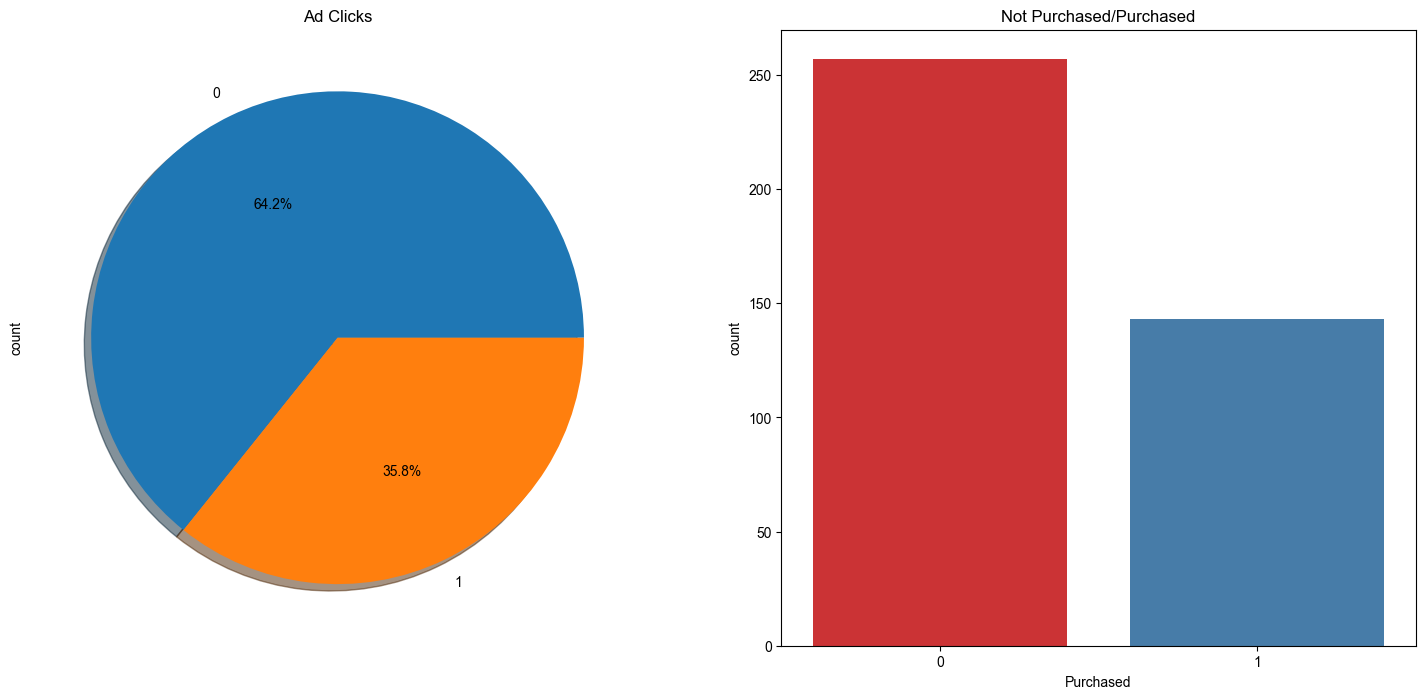

In [10]:
# visualize frequency distribution of Purchased/Unpurchased
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ad_clicks['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Ad Clicks')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")
ax[1].set_title("Not Purchased/Purchased")
sns.set(style='whitegrid')
plt.show()

<h4>Distribution of Purchased by Gender - Purchased/Unpurchased

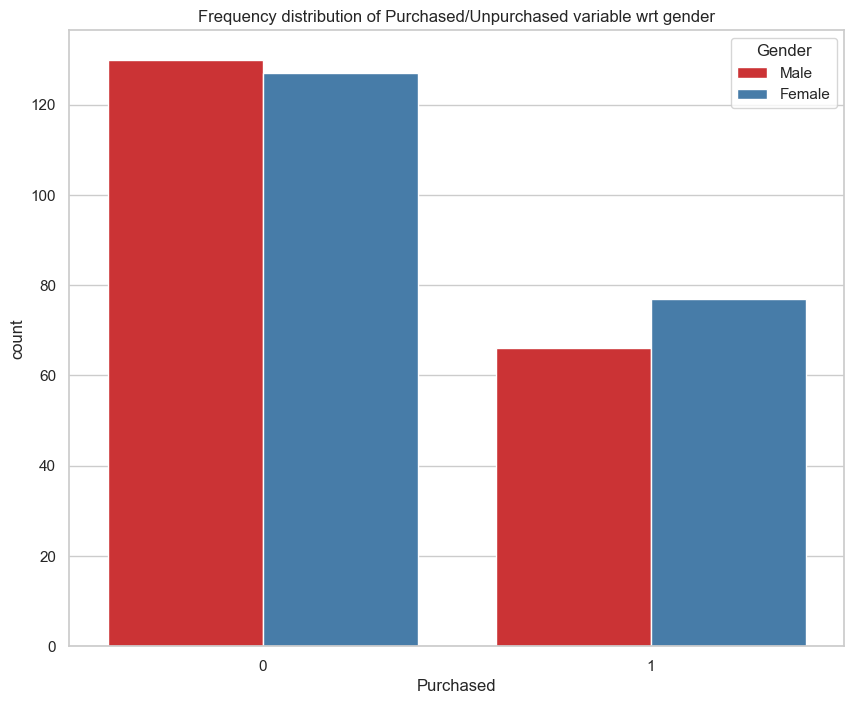

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Purchased", hue="Gender", data=ad_clicks, palette="Set1")
ax.set_title("Frequency distribution of Purchased/Unpurchased variable wrt gender")
plt.show()

Numerical Variables

In [12]:
numerical = [var for var in ad_clicks.columns if ad_clicks[var].dtype!='O']
print(numerical)

['User ID', 'Age', 'EstimatedSalary', 'Purchased']


In [13]:
ad_clicks['Age'].nunique()

43

<b>Age Histogram

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_7297/529743159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')


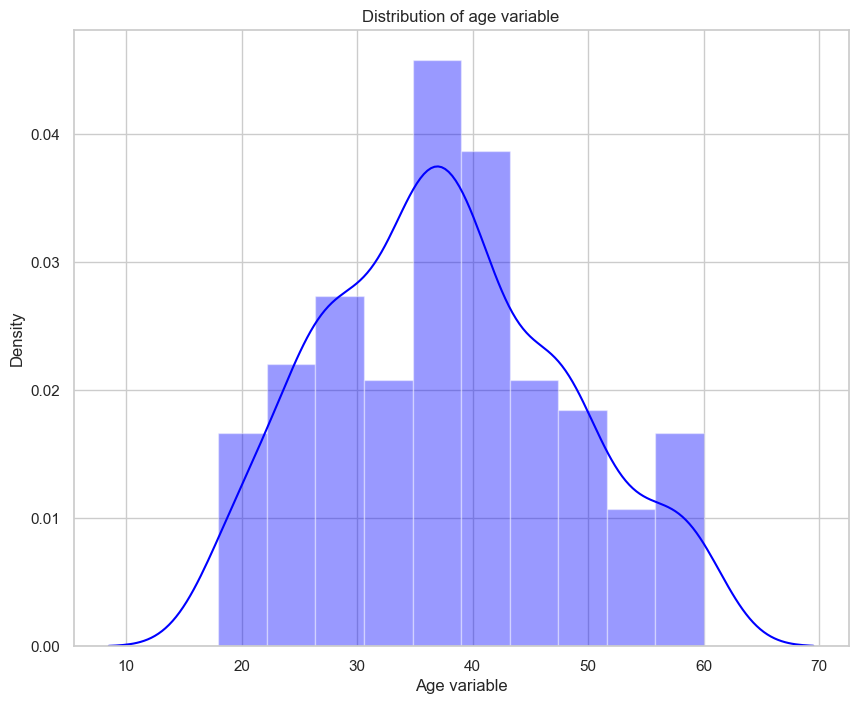

In [14]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

<h4>Age Density

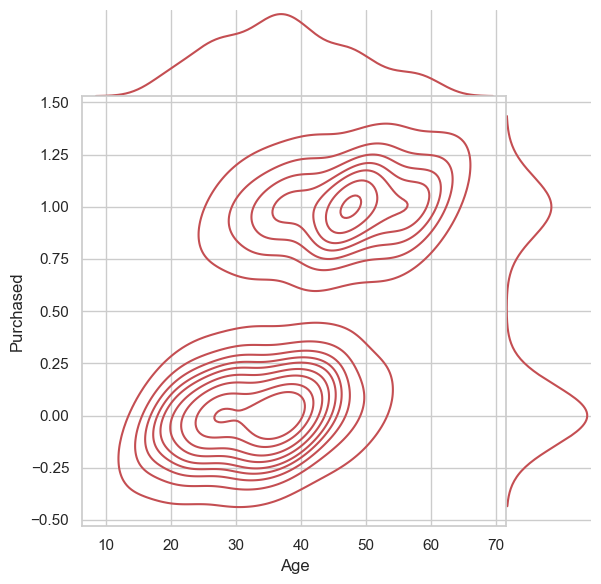

In [15]:
sns.jointplot(x='Age',y='Purchased',data=ad_clicks,kind="kde", space=0, color="r")

<b>Age B&W

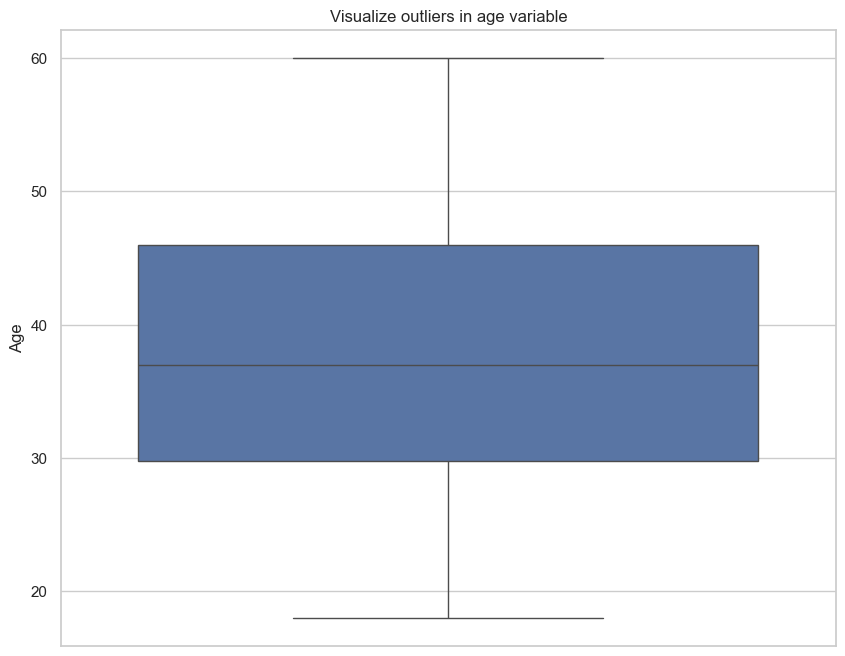

In [16]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

<b>Age and Purchased/Unpurchased B&W

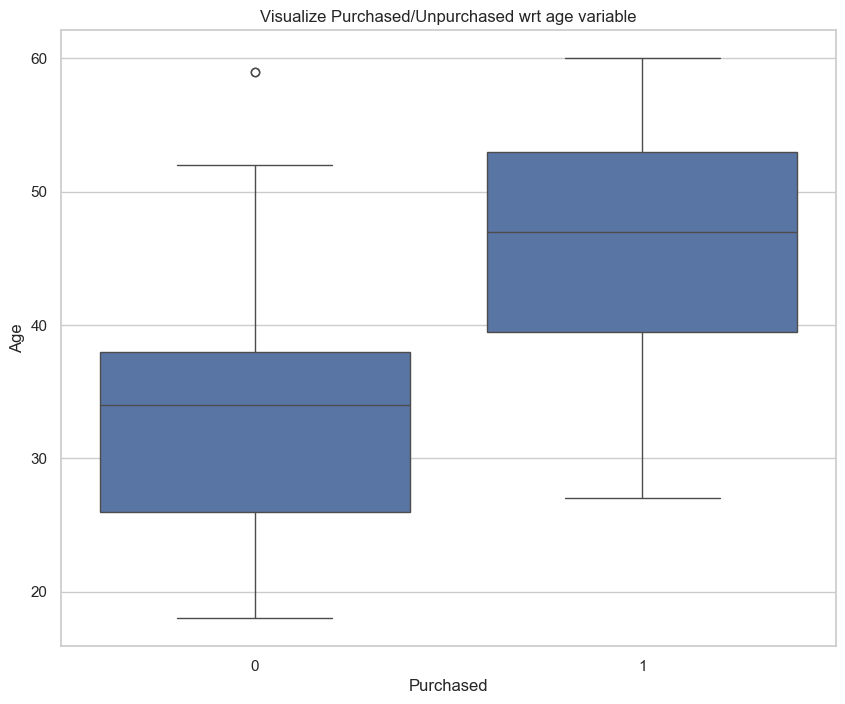

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt age variable")
plt.show()

<b>Age, Unpurchased by Gender, Purchased by Gender B&W

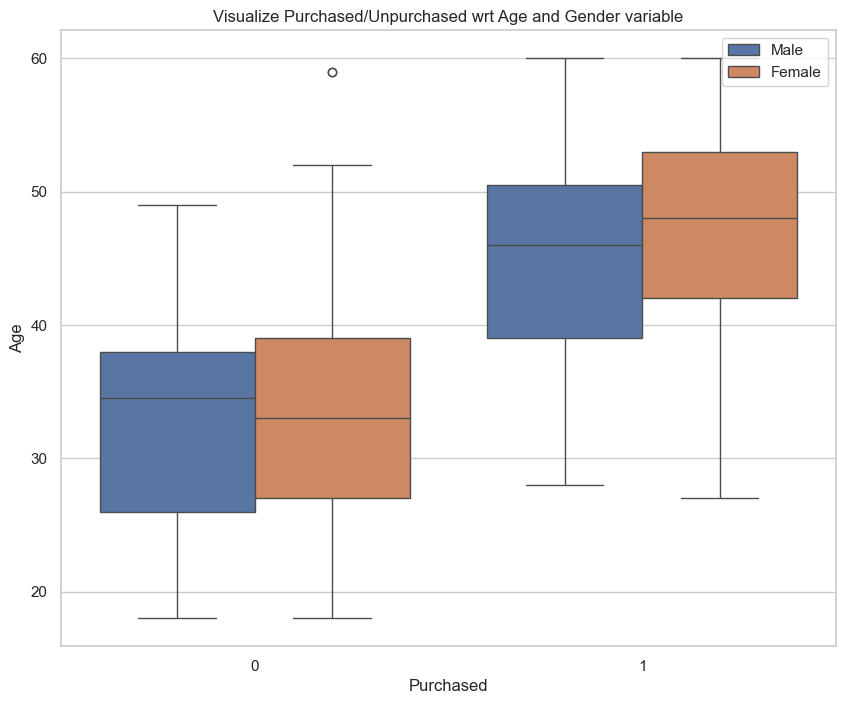

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Age and Gender variable")
ax.legend(loc='upper right')
plt.show()

<b>Age, Unpurchased/Purchased Male, Unpurchased/Purchased Female

<Figure size 800x600 with 0 Axes>

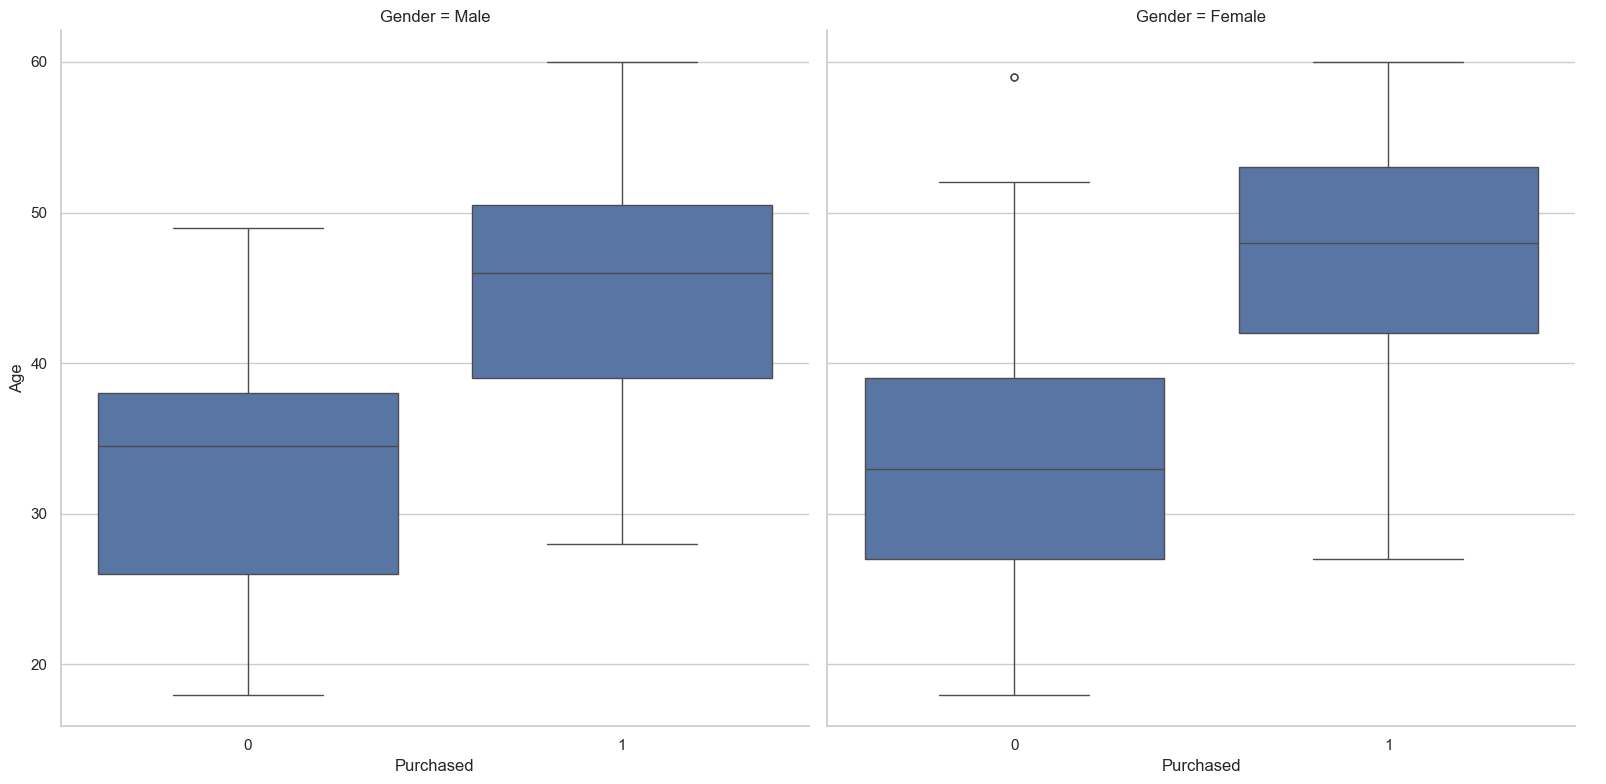

In [19]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="Age", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

<b>Salary Histogram

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_7297/1924820996.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')


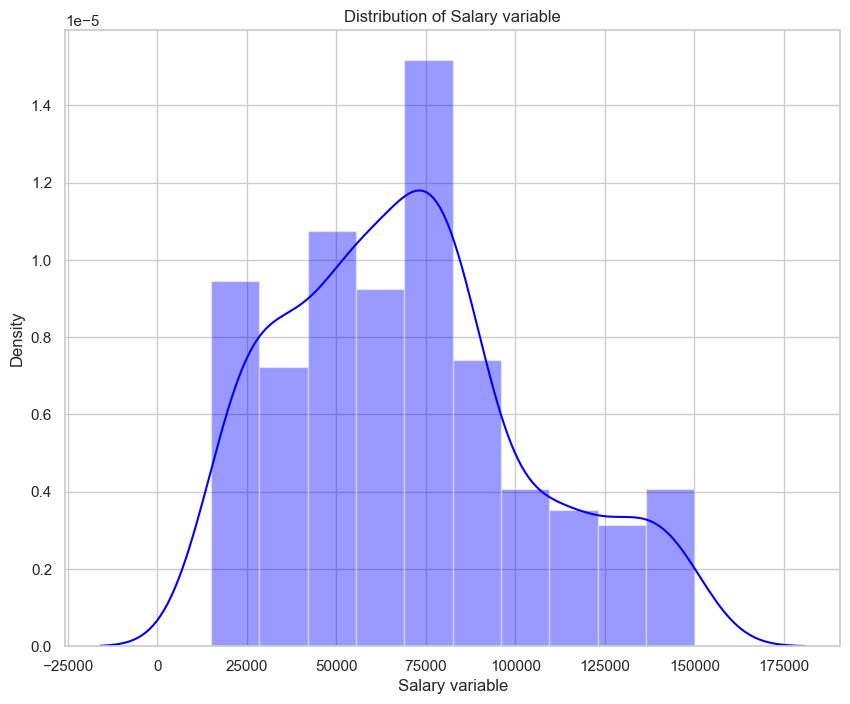

In [20]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
x = pd.Series(x, name="Salary variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Salary variable")
plt.show()

<h4>Salary Density 

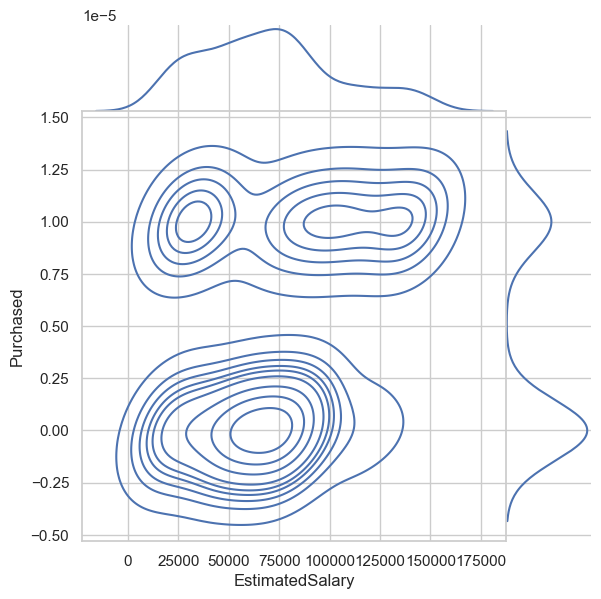

In [21]:
sns.jointplot(x='EstimatedSalary',y='Purchased',data=ad_clicks,kind="kde", space=0, color="b")

<b>Salary B&W

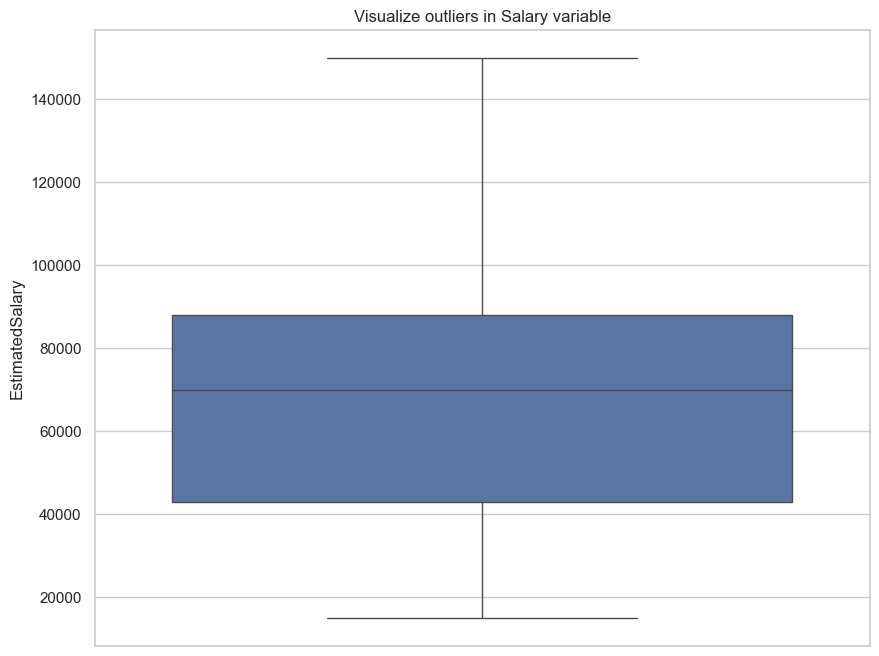

In [22]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Salary variable")
plt.show()

<b>Salary, Unpurchased/Purchased B&W

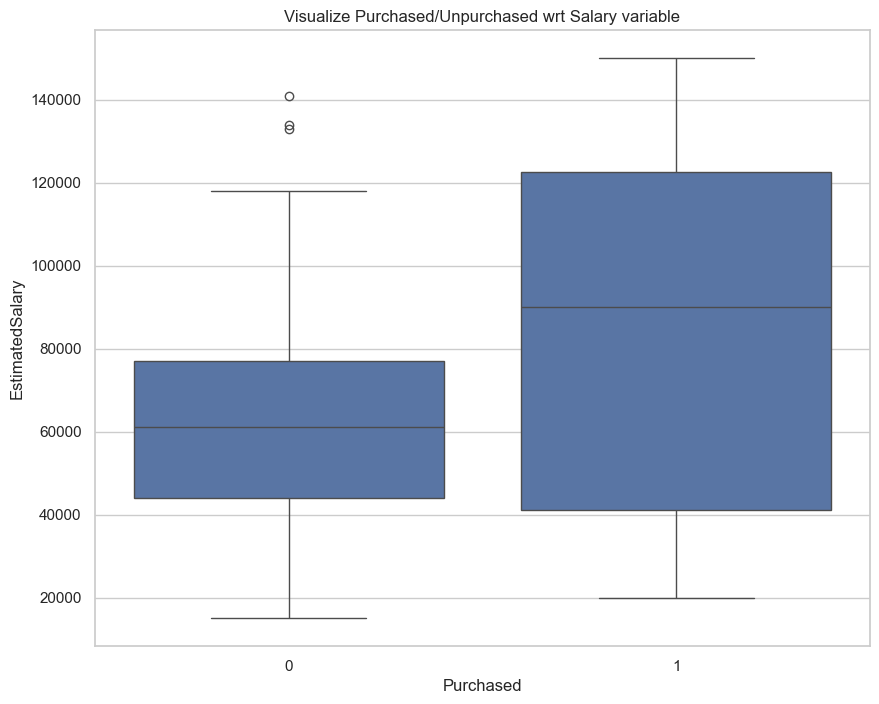

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary variable")
plt.show()

<b>Salary, Unpurchased by Gender, Purchased by Gender B&W

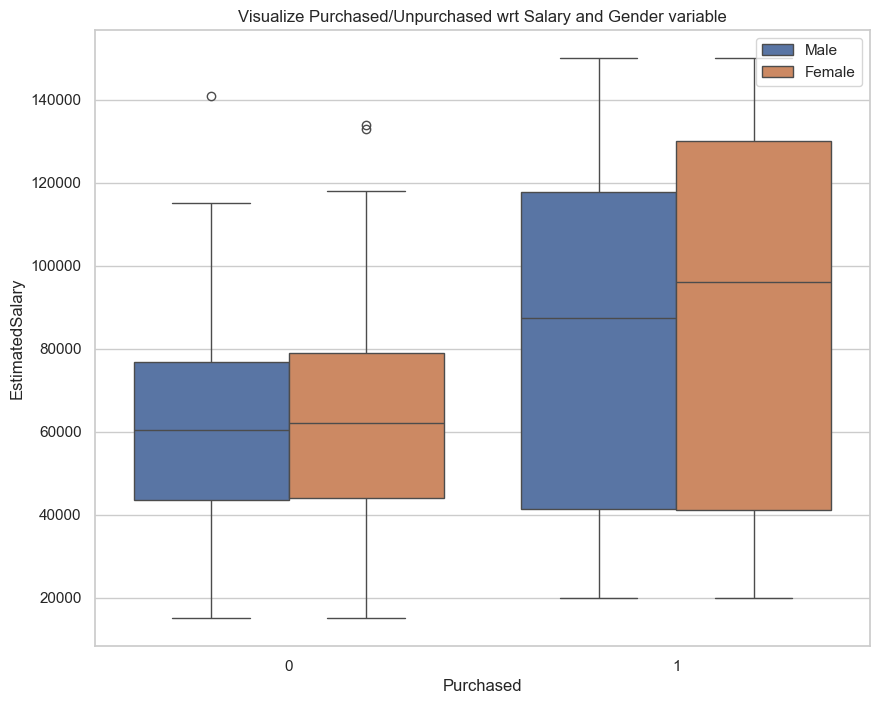

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary and Gender variable")
ax.legend(loc='upper right')
plt.show()

<b>Salary, Unpurchased/Purchased Male, Unpurchased/Purchased Female B&W

<Figure size 800x600 with 0 Axes>

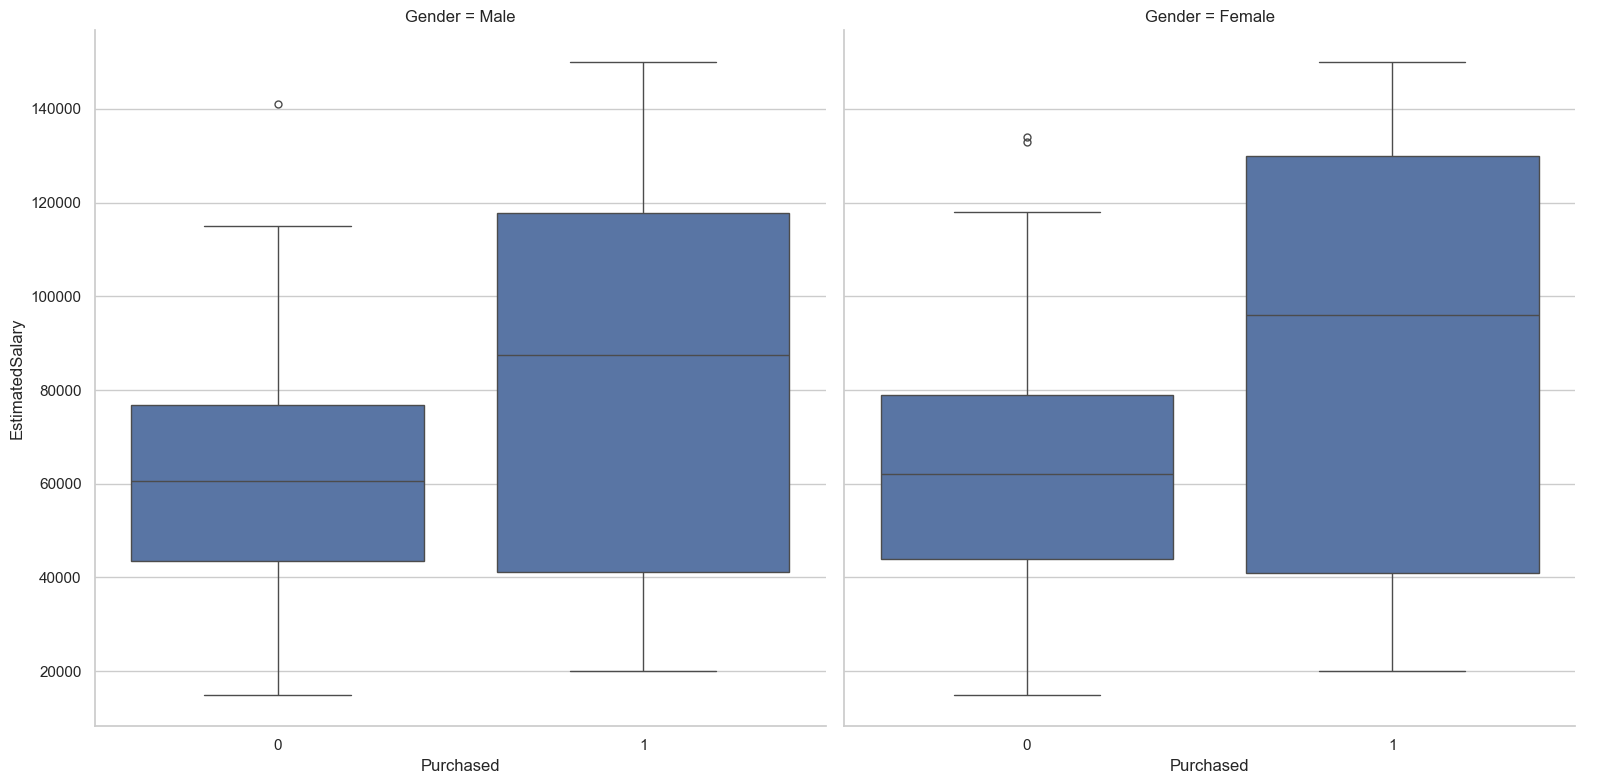

In [25]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

Target Age Distributions

In [26]:
min_value = ad_clicks['Age'].min()
max_value = ad_clicks['Age'].max()
print(min_value, max_value)
age_bins_ar2 = np.linspace(min_value,max_value,5)
print(age_bins_ar2)

18 60
[18.  28.5 39.  49.5 60. ]


<h4>Target Market Age Tier Distribution

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_7297/3902410663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


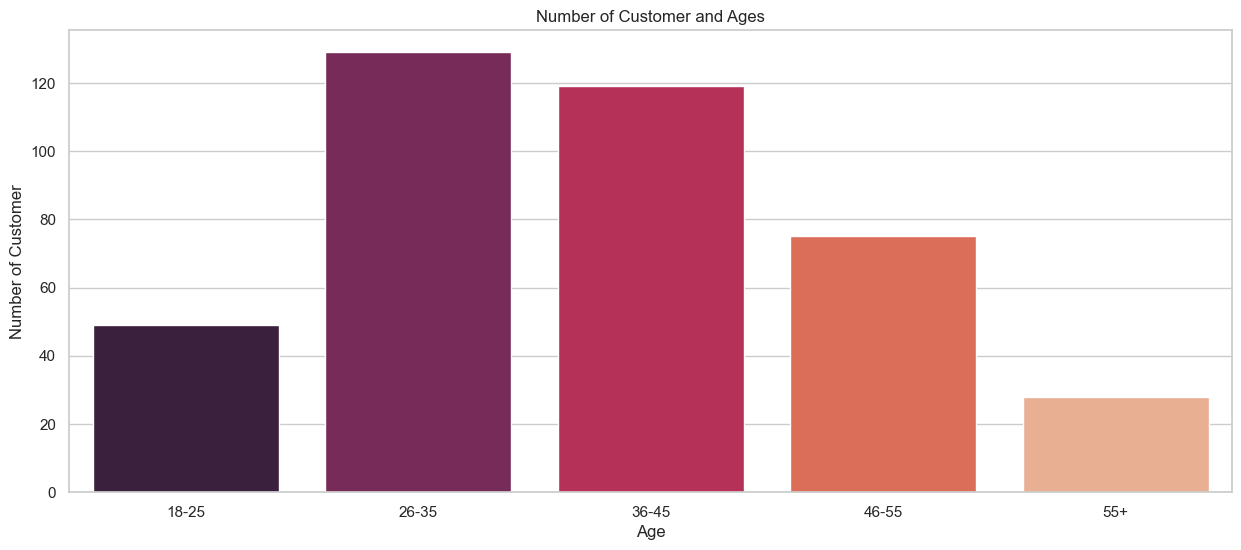

In [27]:
age18_25 = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18)]
age26_35 = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26)]
age36_45 = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36)]
age46_55 = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46)]
age55above = ad_clicks.loc[ad_clicks.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
y2= [(age18_25.values),(age26_35.values),(age36_45.values),(age46_55.values),(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [28]:
y_sum = sum(y)
y_array = np.asarray(y)
perc_list = y_array/y_sum
perc_val = perc_list*100
dict = {'Age Group': x, 'Total Count': y_array, 'Percentage of Users': perc_val}
age_df = pd.DataFrame(dict)
age_df.style.format({'Percentage of Users': '{0:.2f}%'.format,})

,Age Group,Total Count,Percentage of Users
0,18-25,49,12.25%
1,26-35,129,32.25%
2,36-45,119,29.75%
3,46-55,75,18.75%
4,55+,28,7.00%


<h4>Target Age Group, Gender Distribution 

In [29]:
age18_25f = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')]
age18_25fP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')& (ad_clicks.Purchased == 1)]
age18_25fNP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Female')& (ad_clicks.Purchased == 0)]
age18_25m = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male')]
age18_25mP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age18_25mNP = ad_clicks.loc[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age26_35f = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female')]
age26_35fP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age26_35fNP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age26_35m = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male')]
age26_35mP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age26_35mNP = ad_clicks.loc[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age36_45f = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female')]
age36_45fP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age36_45fNP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age36_45m = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male')]
age36_45mP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age36_45mNP = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age46_55f = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female')]
age46_55fP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age46_55fNP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age46_55m = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male')]
age46_55mP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age46_55mNP = ad_clicks.loc[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

age55abovef = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female')]
age55abovefP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
age55abovefNP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
age55abovem = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male')]
age55abovemP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
age55abovemNP = ad_clicks.loc[(ad_clicks.Age >= 56) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]


agex =  ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
ageyf = [len(age18_25f.values),len(age26_35f.values),len(age36_45f.values),len(age46_55f.values),len(age55abovef.values)]
ageym = [len(age18_25m.values),len(age26_35m.values),len(age36_45m.values),len(age46_55m.values),len(age55abovem.values)]

agefP = [len(age18_25fP.values), len(age26_35fP.values), len(age36_45fP.values), len(age46_55fP.values), len(age55abovefP.values)]
agefNP = [len(age18_25fNP.values), len(age26_35fNP.values), len(age36_45fNP.values), len(age46_55fNP.values), len(age55abovefNP.values)]
agemP = [len(age18_25mP.values), len(age26_35mP.values), len(age36_45mP.values), len(age46_55mP.values), len(age55abovemP.values)]
agemNP = [len(age18_25mNP.values), len(age26_35mNP.values), len(age36_45mNP.values), len(age46_55mNP.values), len(age55abovemNP.values)]

dict2 = {'Age Group': agex, 'Female Count': ageyf, 'Male Count':ageym}
age_gender_df = pd.DataFrame(dict2)
age_gender_df 


,Age Group,Female Count,Male Count
0,18-25,22,27
1,26-35,65,64
2,36-45,56,63
3,46-55,45,30
4,55+,16,12


<h4>Nested Pie Distribution of Gender Purchased/Not Purchased by Age Tier

In [30]:
labels = agex
sizes = agey
ages_gender = agefP, agefNP, agemP, agemNP
arr = np.array(ages_gender)
transpose = arr.T
list_age = transpose.tolist()
flattened = [val for sublist in list_age for val in sublist] 

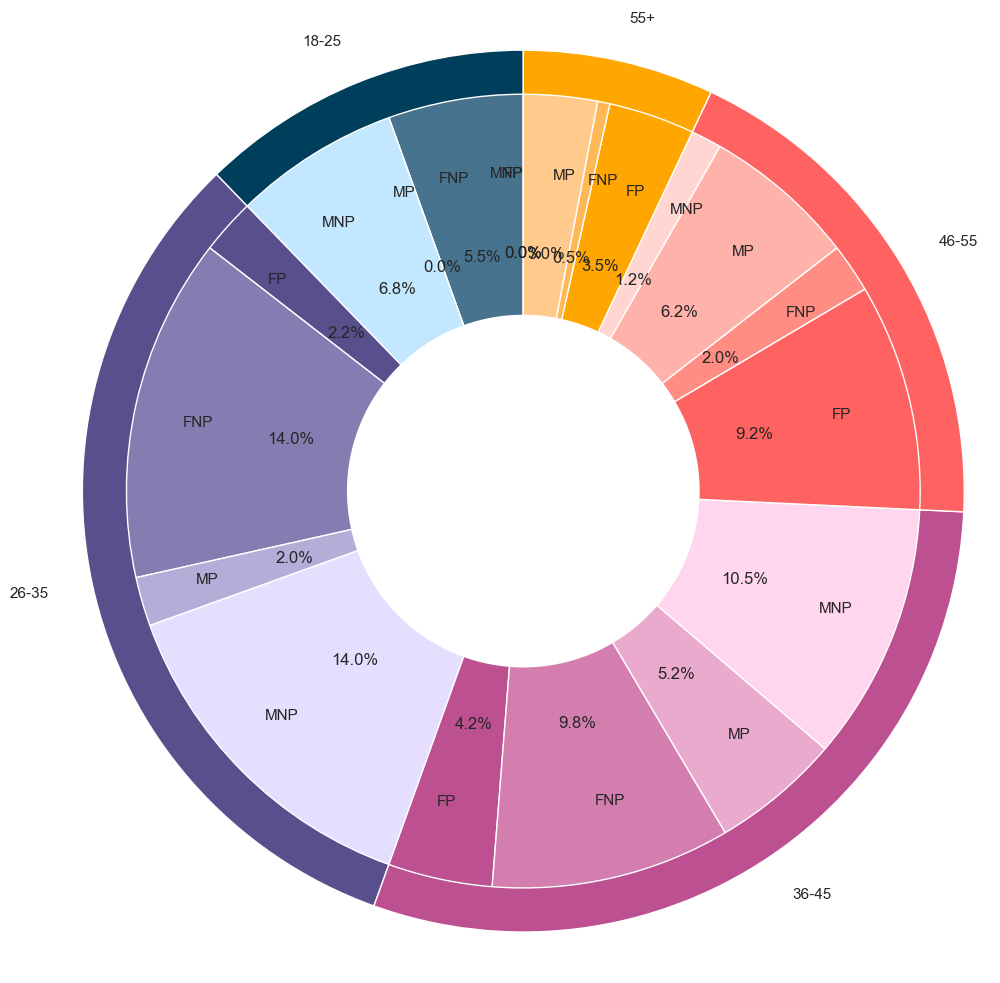

In [31]:
labels_inner = ['FP', 'FNP', 'MP', 'MNP', 'FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP']
sizes_inner = flattened
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
colors_inner = ['#003f5c', '#48738f', '#84abc6','#c2e7ff', 
                   '#58508d','#867cb2','#b6acd8','#e6deff',
                   '#bc5090', '#d37eaf', '#eaaace','#ffd6ed',
                    '#ff6361','#ff8d84','#ffb2aa','#ffd6d1',
                    '#ffa600','#ffb856', '#ffca8b','#fbddbe']
 
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_inner, labels=labels_inner,
                  colors=colors_inner, radius=.9,
                  startangle=90, labeldistance=0.8, autopct='%1.1f%%',)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()

plt.show()

#Calculate Age Group - Gender Subarray ; Purchased/Unpurchased (repeat charts)

<h4>Target Market Tier Estimated Salary Distribution

/var/folders/vy/qdp8xcfj4s3dd5c6d1xp_y3w0000gn/T/ipykernel_7297/3943024105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=esx, y=esy, palette="Set2")


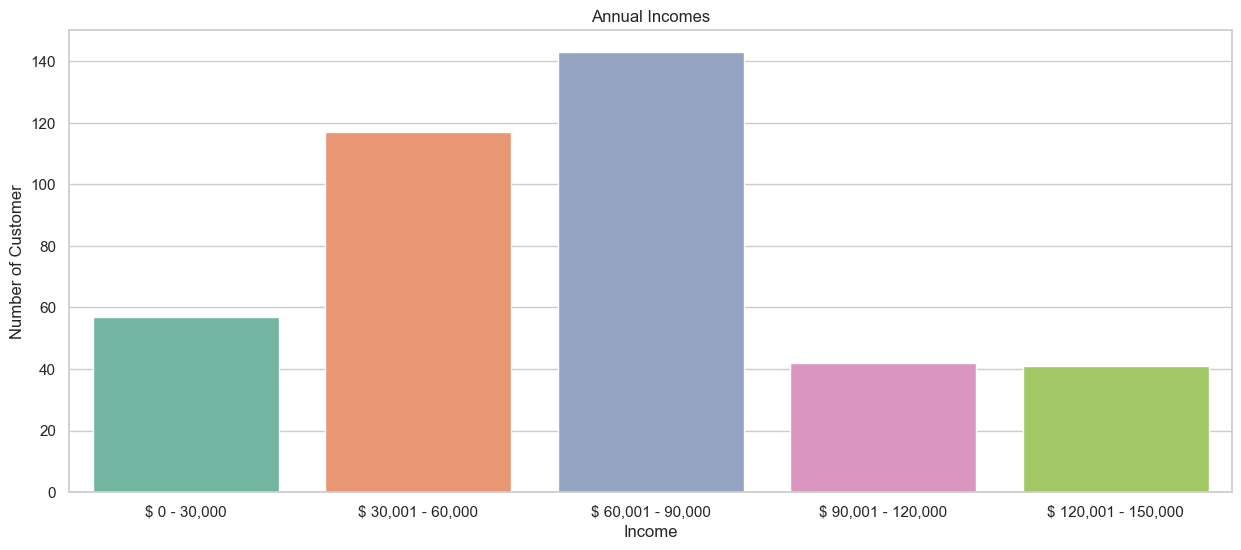

In [32]:
es0_30 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000)]
es31_60 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000)]
es61_90 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000)]
es91_120 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000)]
es121_150 = ad_clicks['EstimatedSalary'][(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000)]

esx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
esy = [len(es0_30.values), len(es31_60.values), len(es61_90.values), len(es91_120.values), len(es121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=esx, y=esy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

<h4>Target Market Tier Estimated Salary, Gender Distribution

In [33]:
es0_30f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female')]
es0_30fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female')  & (ad_clicks.Purchased == 1)]
es0_30fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es0_30m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male')]
es0_30mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es0_30mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 0) & (ad_clicks['EstimatedSalary'] <= 30000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es31_60f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female')]
es31_60fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es31_60fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es31_60m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male')]
es31_60mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es31_60mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 31000) & (ad_clicks['EstimatedSalary'] <= 60000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es61_90f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female')]
es61_90fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es61_90fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es61_90m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male')]
es61_90mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es61_90mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es91_120f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female')]
es91_120fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es91_120fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es91_120m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male')]
es91_120mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es91_120mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 91000) & (ad_clicks['EstimatedSalary'] <= 120000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

es121_150f = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female')]
es121_150fP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 1)]
es121_150fNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Female') & (ad_clicks.Purchased == 0)]
es121_150m = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male')]
es121_150mP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 1)]
es121_150mNP = ad_clicks.loc[(ad_clicks['EstimatedSalary'] >= 121000) & (ad_clicks['EstimatedSalary'] <= 150000) & (ad_clicks.Gender == 'Male') & (ad_clicks.Purchased == 0)]

esx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
esy = [len(es0_30.values), len(es31_60.values), len(es61_90.values), len(es91_120.values), len(es121_150.values)]
esyf = [len(es0_30f.values), len(es31_60f.values), len(es61_90f.values), len(es91_120f.values), len(es121_150f.values)]
esym = [len(es0_30m.values), len(es31_60m.values), len(es61_90m.values), len(es91_120m.values), len(es121_150m.values)]
esyfP= [len(es0_30fP.values), len(es31_60fP.values), len(es61_90fP.values), len(es91_120fP.values), len(es121_150fP.values)]
esyfNP= [len(es0_30fNP.values), len(es31_60fNP.values), len(es61_90fNP.values), len(es91_120fNP.values), len(es121_150fNP.values)]
esymP = [len(es0_30mP.values), len(es31_60mP.values), len(es61_90mP.values), len(es91_120mP.values), len(es121_150mP.values)]
esymNP = [len(es0_30mNP.values), len(es31_60mNP.values), len(es61_90mNP.values), len(es91_120mNP.values), len(es121_150mNP.values)]



Calculations

In [34]:
esy_sum = sum(esy)
esy_array = np.asarray(esy)
print(esy_array)
esperc_list = esy_array/esy_sum
print(esperc_list)
esperc_val = esperc_list*100
print(esperc_val)

totalP =(np.add(esymP,esyfP))
totalmP = (np.sum(esymP))
totalfP = (np.sum(esyfP))
percP =((np.add(esymP,esyfP))/esy_array)*100

percmP = (np.divide(esymP,esym))*100 #%of Males Purchased of all Males in group (malePurchased/TotalMales in group)
percmPofTP = (np.divide(esymP,totalP))*100 #%ofMales Purchased of Total Purchases in Group
percfP = (np.divide(esyfP,esyf))*100
percfPofTP = (np.divide(esyfP,totalP))*100

percmPofTMP = (np.divide(esymP,totalmP))*100 #%of Purchases of all Male purchases
percfPofTFP = (np.divide(esyfP,totalfP))*100

MPofTP = (np.divide(esymP,np.sum(totalP)))#gender Purchases of all Purchases 
FPofTP = (np.divide(esyfP,np.sum(totalP)))
print(percP)
print(percmP)
print(percfP)
print(FPofTP)

[ 57 117 143  42  41]
[0.1425 0.2925 0.3575 0.105  0.1025]
[14.25 29.25 35.75 10.5  10.25]
[35.0877193  23.07692308 17.48251748 78.57142857 92.68292683]
[34.48275862 19.29824561 20.51282051 87.5        93.75      ]
[35.71428571 26.66666667 13.84615385 73.07692308 92.        ]
[0.06993007 0.11188811 0.06293706 0.13286713 0.16083916]


<h4>Dataframe for Target Market Tier Purchases - Estimated Salary, Gender Distribution

In [35]:
dict = {'Salary Group': esx, 'Total Count': esy_array, 'Percentage of Users': esperc_val, 'TotalP':totalP, '%PofTotalCount':percP, 
        'Male':esym, 'MalePurchased':esymP, 'MPofTotalPofGroup':percmPofTP, '%ofMalePofMGroup':percmP, '%MPofTotalMP':percmPofTMP,'MPofTotalP':MPofTP, 
        'Female':esyf, 'FemalePurchased':esyfP, 'FPofTotalPofGroup':percfPofTP, '%ofFemalePofFGroup':percfP,'%FPofTotalFP':percfPofTFP, 'FPofTotalP':FPofTP, 
         'MaleNotP':esymNP, 'FemaleNotP':esyfNP}
salary_df = pd.DataFrame(dict)

salary_df.style.format({'Percentage of Users': '{0:.2f}%'.format, '%PofTotalCount': '{0:.2f}%'.format,
'MPofTotalPofGroup': '{0:.2f}%'.format, '%ofMalePofMGroup': '{0:.2f}%'.format,'%MPofTotalMP': '{0:.2f}%'.format,
'MPofTotalP': '{0:.2f}%'.format,'FPofTotalPofGroup': '{0:.2f}%'.format, '%ofFemalePofFGroup': '{0:.2f}%'.format,
'%FPofTotalFP': '{0:.2f}%'.format,'FPofTotalP': '{0:.2f}%'.format,})


,Salary Group,Total Count,Percentage of Users,TotalP,%PofTotalCount,Male,MalePurchased,MPofTotalPofGroup,%ofMalePofMGroup,%MPofTotalMP,MPofTotalP,Female,FemalePurchased,FPofTotalPofGroup,%ofFemalePofFGroup,%FPofTotalFP,FPofTotalP,MaleNotP,FemaleNotP
0,"$ 0 - 30,000",57,14.25%,20,35.09%,29,10,50.00%,34.48%,15.15%,0.07%,28,10,50.00%,35.71%,12.99%,0.07%,19,18
1,"$ 30,001 - 60,000",117,29.25%,27,23.08%,57,11,40.74%,19.30%,16.67%,0.08%,60,16,59.26%,26.67%,20.78%,0.11%,46,44
2,"$ 60,001 - 90,000",143,35.75%,25,17.48%,78,16,64.00%,20.51%,24.24%,0.11%,65,9,36.00%,13.85%,11.69%,0.06%,62,56
3,"$ 90,001 - 120,000",42,10.50%,33,78.57%,16,14,42.42%,87.50%,21.21%,0.10%,26,19,57.58%,73.08%,24.68%,0.13%,2,7
4,"$ 120,001 - 150,000",41,10.25%,38,92.68%,16,15,39.47%,93.75%,22.73%,0.10%,25,23,60.53%,92.00%,29.87%,0.16%,1,2


<b>Salary Group</b> : 5 Salary Categories of Users <br>
<b>Total Count</b> : Total Count of Users in Each Salary Tier <br>
<b>Percentage of Users</b>: Percentage of Users /Total Users <br>
<b>TotalP</b> : Count of Purchased for Salary Tier <br>
<b>%PofTotalCount</b> : % Purchased for Category Tier out of all users in Category Tier <br>
<b>Male</b> : # of Male Users in Category Tier <br>
<b>MalePurchased</b> : # of Males Purchased in Category Tier <br>
<b>MPofTotalPofGroup</b> : % of Males Purchased of all Purchased in Category Tier <br>
<b>%ofMalePofMGroup</b> : % of Males Purchased of all Males in Category Tier <br>
<b>%MPofTotalMP</b> : % of Males Purchased in Category Tier of all Males Purchased <br>
<b>MPofTotalP</b> : % of Males Purchased in Category Tier of all Purchased <br>
<b>Female</b> : # of Female Users in Category Tier <br>
<b>FemalePurchased</b> :  # of Females Purchased in Category Tier <br>
<b>FPofTotalPofGroup</b> : % of Females Purchased of all Purchased in Category Tier <br>
<b>%ofFemalePofFGroup</b> : % of Females Purchased of all Females in Category Tier <br>
<b>%FPofTotalFP</b> : % of Females Purchased in Category Tier of all Females Purchased <br>
<b>FPofTotalP</b> : % of Females Purchased in Category Tier of all Purchased <br>
<b>MaleNotP</b> : # of Males Not Purchased in Category Tier <br>
<b>FemaleNotP</b> : # of Female Not Purchased in Category Tier <br> 

<h4>Nested Pie Distribution of Gender Purchased/Not Purchased by Salary Tier

In [36]:
sizes_gender = esyfP, esyfNP, esymP, esymNP
labels = esx
sizes = esy
arr = np.array(sizes_gender)
transpose = arr.T
list_gender = transpose.tolist()
flattened = [val for sublist in list_gender for val in sublist] 

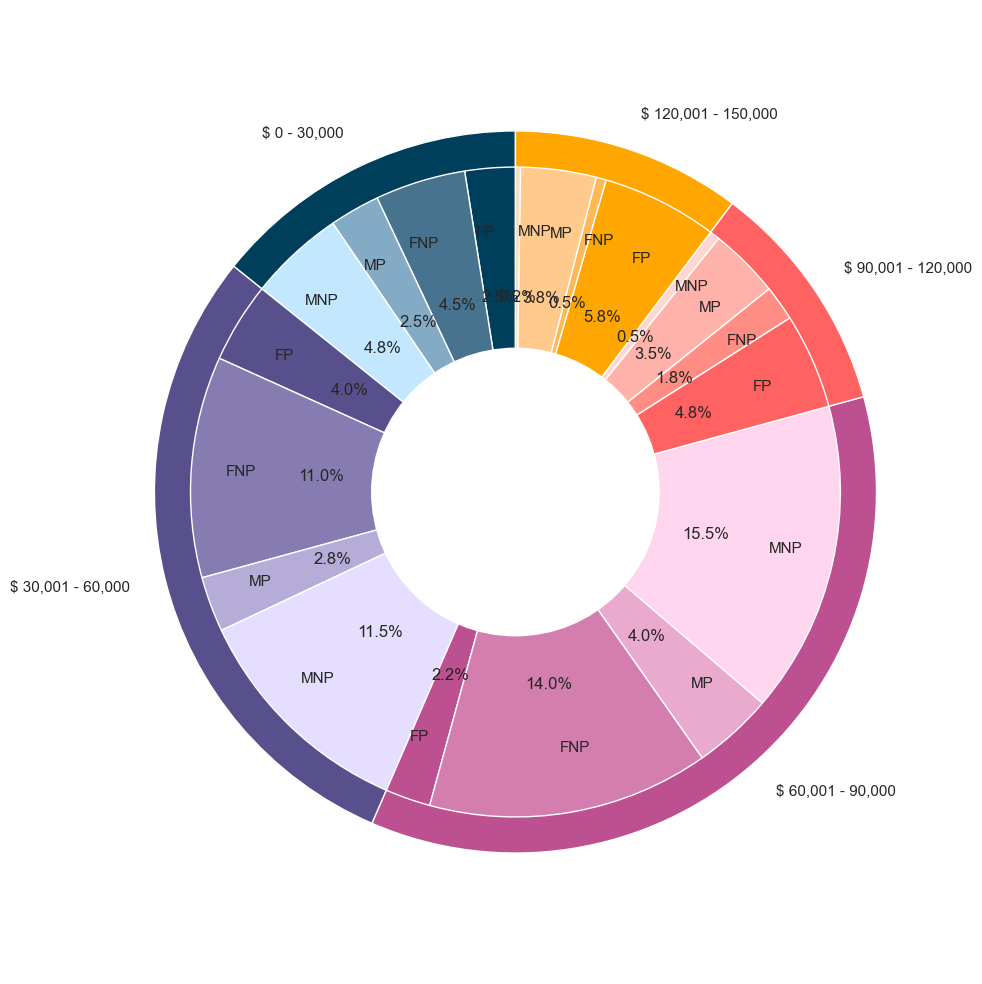

In [37]:
labels_inner = ['FP', 'FNP', 'MP', 'MNP', 'FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP','FP', 'FNP', 'MP', 'MNP']
sizes_inner = flattened
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
colors_inner = ['#003f5c', '#48738f', '#84abc6','#c2e7ff', 
                   '#58508d','#867cb2','#b6acd8','#e6deff',
                   '#bc5090', '#d37eaf', '#eaaace','#ffd6ed',
                    '#ff6361','#ff8d84','#ffb2aa','#ffd6d1',
                    '#ffa600','#ffb856', '#ffca8b','#fbddbe']
 
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_inner, labels=labels_inner,
                  colors=colors_inner, radius=.9,
                  startangle=90, labeldistance=0.8, autopct='%1.1f%%',)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()

plt.show()

Calculate Salary Group - Gender Subarray ; Purchased/Unpurchased 

Ex: representative percentage of purchased if man aged 41 with salary of 57k

In [38]:
#predict percentage of purchased if man aged 41 with salary of 57k

case_selection = ad_clicks.loc[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36) & (ad_clicks.Gender == 'Male') & (ad_clicks['EstimatedSalary'] >= 61000) & (ad_clicks['EstimatedSalary'] <= 90000)]
case_P = case_selection.loc[case_selection.Purchased ==1]
case_NP = case_selection.loc[case_selection.Purchased ==0]
case_P


,User ID,Gender,Age,EstimatedSalary,Purchased
282,15750447,Male,37,70000,1
296,15673539,Male,42,73000,1
303,15637593,Male,37,79000,1
358,15573926,Male,40,71000,1
378,15577806,Male,41,87000,1


Groupby Gender, Purchased

In [39]:
multi = ad_clicks.groupby(['Purchased', 'Gender']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi_fill = multi.fillna(0)
multi_fill

Age EstimatedSalary
                 count            mean
Purchased Gender                      
0         Female   127    61480.314961
          Male     130    59630.769231
1         Female    77    88714.285714
          Male      66    83424.242424

<h4>Age v Salary Scatter, 0:Unpurchased, 1:Purchased

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

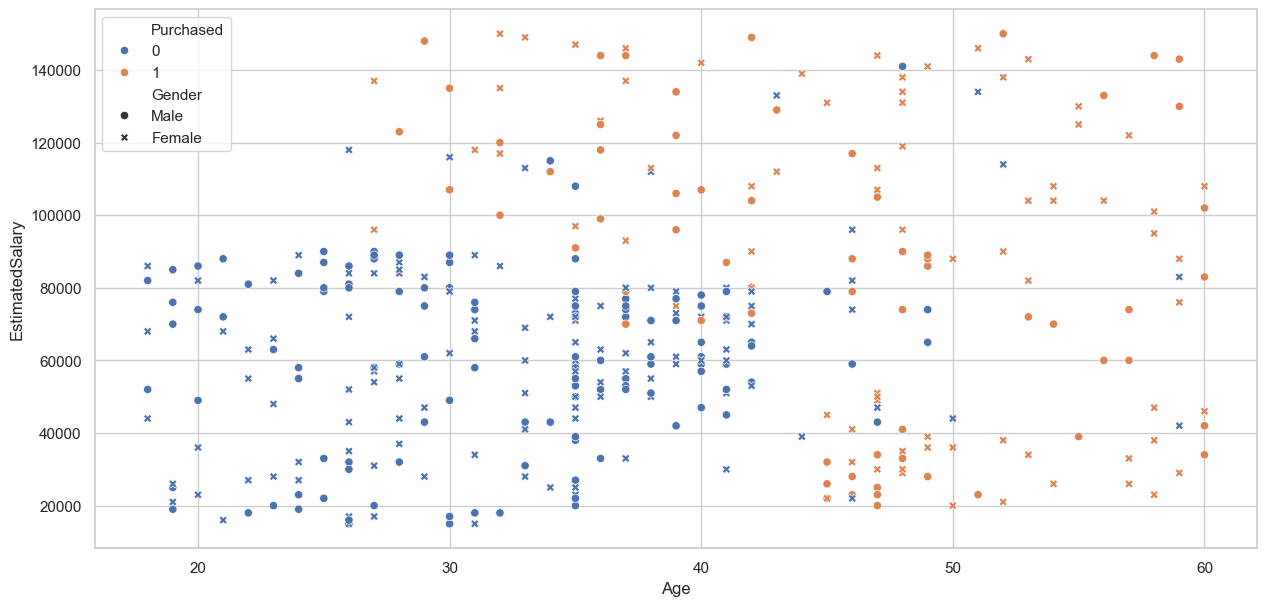

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=ad_clicks,x='Age',y='EstimatedSalary',hue='Purchased',style='Gender')

Descriptive Analysis

In [41]:
ad_clicks.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [42]:
ad_clicks2 = ad_clicks
ad_clicks2['Gender'] = ad_clicks2['Gender'].map({"Male":0, "Female":1})
ad_clicks2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [43]:
ad_clicks2.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400.0,5.100000e-01,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


<h4>K-Means Optimal Clusters - WCSS

<h5>Elbow K-Means 

In [44]:
ad_clicks

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


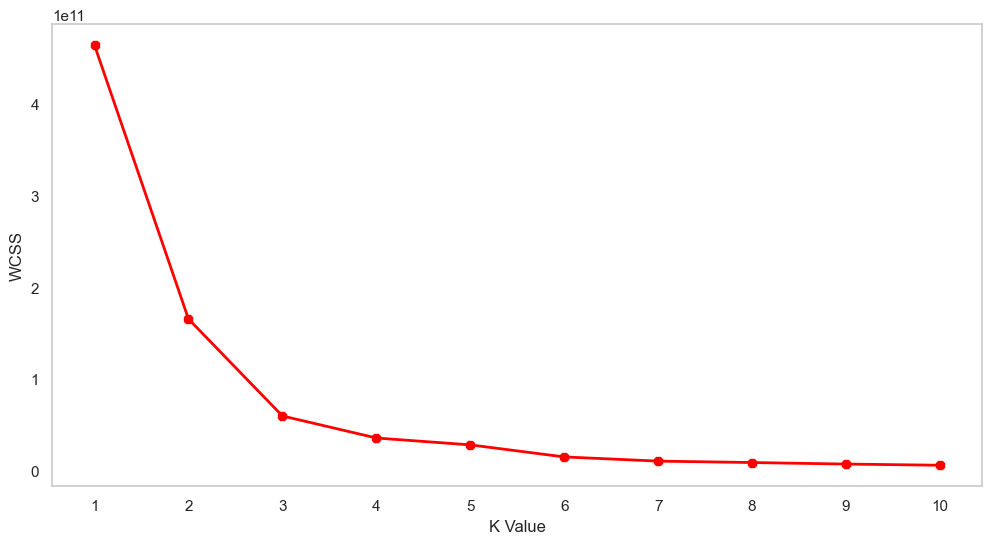

In [46]:
from sklearn.cluster import KMeans
X2=ad_clicks[["Age","EstimatedSalary","Gender"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(ad_clicks.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

k-value determined to be 3 using the elbow method

In [108]:
ad_clicks = ad_clicks.drop(['label', 'label_ageES'], axis=1)

In [109]:
ad_clicks.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


K-Means Clustering POC

In [110]:
X2=ad_clicks[["Age","EstimatedSalary","Gender"]]
km = KMeans(n_clusters=3)
clusters = km.fit_predict(X2) #fit and assign
ad_clicks["label"] = clusters #labels to column
ad_clicks.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,label
0,15624510,0,19,19000,0,0
1,15810944,0,35,20000,0,0
2,15668575,1,26,43000,0,0
3,15603246,1,27,57000,0,1
4,15804002,0,19,76000,0,1


In [111]:

# Assuming ad_clicks and the clustering code are already executed
for i in range(3):  # Loop through clusters 0, 1, 2
    cluster_data = ad_clicks[ad_clicks["label"] == i]
    age_range = (cluster_data["Age"].min(), cluster_data["Age"].max())
    salary_range = (cluster_data["EstimatedSalary"].min(), cluster_data["EstimatedSalary"].max())
    gender_counts = (cluster_data["Gender"].value_counts())
    print(f"Cluster {i}:")
    print(f"  Age range: {age_range}")
    print(f"  EstimatedSalary range: {salary_range}")
    print(f"  Gender Counts: {gender_counts}")

Cluster 0:
  Age range: (np.int64(18), np.int64(60))
  EstimatedSalary range: (np.int64(15000), np.int64(55000))
  Gender Counts: Gender
1    78
0    70
Name: count, dtype: int64
Cluster 1:
  Age range: (np.int64(18), np.int64(60))
  EstimatedSalary range: (np.int64(57000), np.int64(100000))
  Gender Counts: Gender
0    98
1    81
Name: count, dtype: int64
Cluster 2:
  Age range: (np.int64(26), np.int64(60))
  EstimatedSalary range: (np.int64(101000), np.int64(150000))
  Gender Counts: Gender
1    45
0    28
Name: count, dtype: int64


Re-run the clustering using only Age and EstimatedSalary:

In [112]:
X = ad_clicks[["Age", "EstimatedSalary"]]
km = KMeans(n_clusters=3)
clusters = km.fit_predict(X)
ad_clicks["label_ageES"] = clusters
ad_clicks.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,label,label_ageES
0,15624510,0,19,19000,0,0,2
1,15810944,0,35,20000,0,0,2
2,15668575,1,26,43000,0,0,2
3,15603246,1,27,57000,0,1,0
4,15804002,0,19,76000,0,1,0


After clustering without Gender, check the Gender distribution in each cluster:

In [113]:
# Assuming ad_clicks and the clustering code are already executed
for i in range(3):  # Loop through clusters 0, 1, 2
    cluster_data = ad_clicks[ad_clicks["label_ageES"] == i]
    age_range = (cluster_data["Age"].min(), cluster_data["Age"].max())
    salary_range = (cluster_data["EstimatedSalary"].min(), cluster_data["EstimatedSalary"].max())
    gender_counts = (cluster_data["Gender"].value_counts())
    print(f"Cluster {i}:")
    print(f"  Age range: {age_range}")
    print(f"  EstimatedSalary range: {salary_range}")
    print(f"  Gender Counts: {gender_counts}")

Cluster 0:
  Age range: (np.int64(18), np.int64(60))
  EstimatedSalary range: (np.int64(54000), np.int64(99000))
  Gender Counts: Gender
0    102
1     87
Name: count, dtype: int64
Cluster 1:
  Age range: (np.int64(26), np.int64(60))
  EstimatedSalary range: (np.int64(100000), np.int64(150000))
  Gender Counts: Gender
1    45
0    29
Name: count, dtype: int64
Cluster 2:
  Age range: (np.int64(18), np.int64(60))
  EstimatedSalary range: (np.int64(15000), np.int64(53000))
  Gender Counts: Gender
1    72
0    65
Name: count, dtype: int64


<b> Clustering Analysis Report </b>

<b> Objective </b>
To segment customers based on demographic and economic factors using K-means clustering.

<b> Methodology </b>
- Performed clustering with and without the binary `Gender` variable, using `Age` and `EstimatedSalary` as primary features.
- Determined the optimal number of clusters (k=3) using the elbow method based on WCSS.
- Analyzed cluster characteristics (age range, salary range, gender distribution) for both approaches.

<b> Findings </b>
- **With `Gender` (`Age`, `EstimatedSalary`, `Gender`)**:
  - Cluster 0: Age 18–60, Salary 15K–55K, Gender (78 female, 70 male)
  - Cluster 1: Age 18–60, Salary 57K–100K, Gender (98 male, 81 female)
  - Cluster 2: Age 26–60, Salary 101K–150K, Gender (45 female, 28 male)
  - Slight gender bias observed, but salary ranges dominate segmentation.

- **Without `Gender` (`Age`, `EstimatedSalary`)**:
  - Cluster 0: Age 18–60, Salary 54K–99K, Gender (102 male, 87 female)
  - Cluster 1: Age 26–60, Salary 100K–150K, Gender (45 female, 29 male)
  - Cluster 2: Age 18–60, Salary 15K–53K, Gender (72 female, 65 male)
  - Similar salary-based segmentation with minimal gender influence.

<b> Conclusion </b>
- `Gender` has a minor impact on clustering, with salary ranges (15K–53K, 54K–99K, 100K–150K) driving the segmentation.
- Excluding `Gender` is sufficient, simplifying the model while preserving key patterns. Gender distribution can be analyzed post-clustering for additional insights.
- Recommendation: Use clusters based on `Age` and `EstimatedSalary` for further analysis and visualization.

<h5>3-D tri-axis K-Means Cluster Distribution

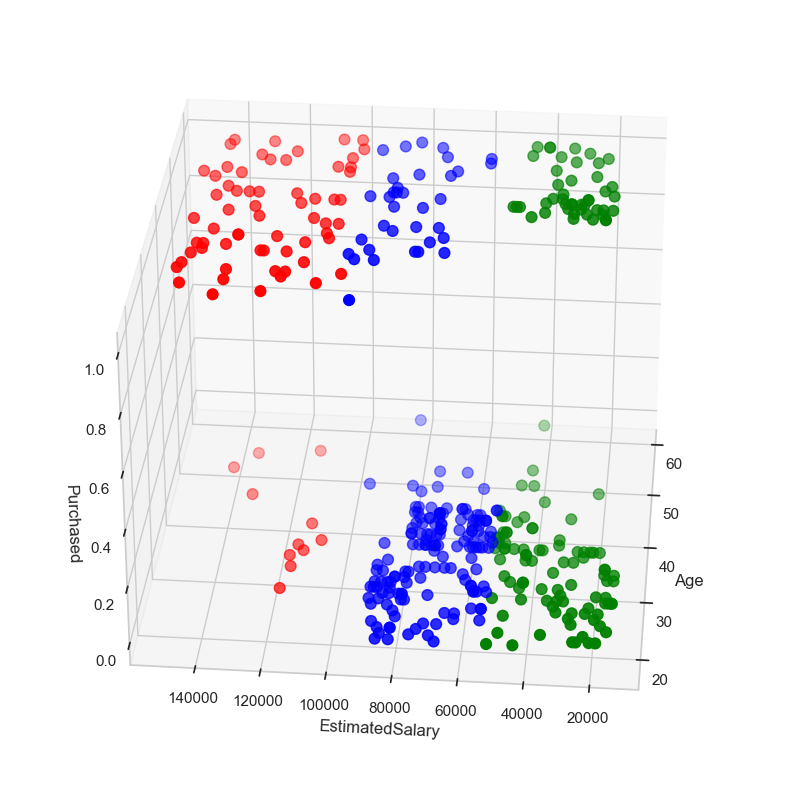

In [114]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ad_clicks.Age[ad_clicks.label_ageES == 0], ad_clicks["EstimatedSalary"][ad_clicks.label_ageES == 0], ad_clicks["Purchased"][ad_clicks.label_ageES == 0], c='blue', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label_ageES == 1], ad_clicks["EstimatedSalary"][ad_clicks.label_ageES == 1], ad_clicks["Purchased"][ad_clicks.label_ageES == 1], c='red', s=60)
ax.scatter(ad_clicks.Age[ad_clicks.label_ageES == 2], ad_clicks["EstimatedSalary"][ad_clicks.label_ageES == 2], ad_clicks["Purchased"][ad_clicks.label_ageES == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
ax.set_zlabel('Purchased')
plt.show()

Age View

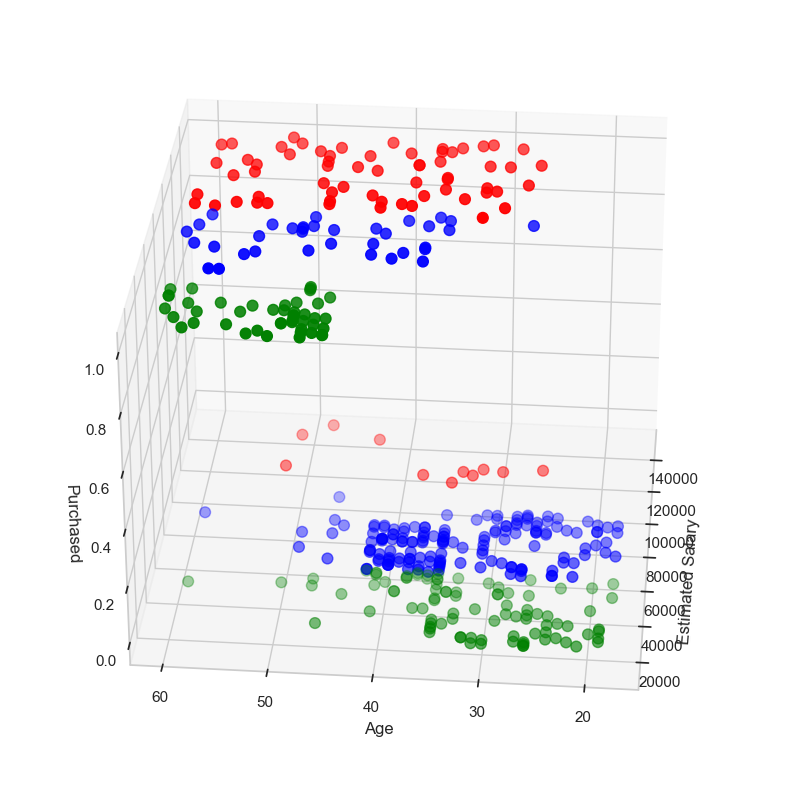

In [115]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label_ageES == 0], ad_clicks["Age"][ad_clicks.label_ageES == 0], ad_clicks["Purchased"][ad_clicks.label_ageES == 0], c='blue', s=60)
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label_ageES == 1], ad_clicks["Age"][ad_clicks.label_ageES == 1], ad_clicks["Purchased"][ad_clicks.label_ageES == 1], c='red', s=60)
ax.scatter(ad_clicks.EstimatedSalary[ad_clicks.label_ageES == 2], ad_clicks["Age"][ad_clicks.label_ageES == 2], ad_clicks["Purchased"][ad_clicks.label_ageES == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Estimated Salary")
plt.ylabel("Age")
ax.set_zlabel('Purchased')
plt.show()

<h5>Cluster Estimated Salary, Age Scatter

In [ ]:
# ad_clicks has numerical 'label' (0, 1, 2), 'Purchased' (0, 1), and 'Gender' (0, 1)
# Create a copy of the DataFrame to avoid modifying the original
ad_clicks_modified = ad_clicks.copy()

# Map numerical values to descriptive labels
ad_clicks_modified['label_desc'] = ad_clicks_modified['label_ageES'].map({
    0: 'Salary 54K-99K; 18-60', #values based on clustered range output 
    1: 'Salary 100K-150K; 26-60',
    2: 'Salary 15K-53; 18-60'
})
ad_clicks_modified['Purchased_desc'] = ad_clicks_modified['Purchased'].map({
    0: 'Not Purchased',
    1: 'Purchased'
})
#"Gender/Purchase Analysis for Target Salary Range 15K-55K"
ad_clicks_modified['Gender_desc'] = ad_clicks_modified['Gender'].map({
    0: 'Male',
    1: 'Female'
})

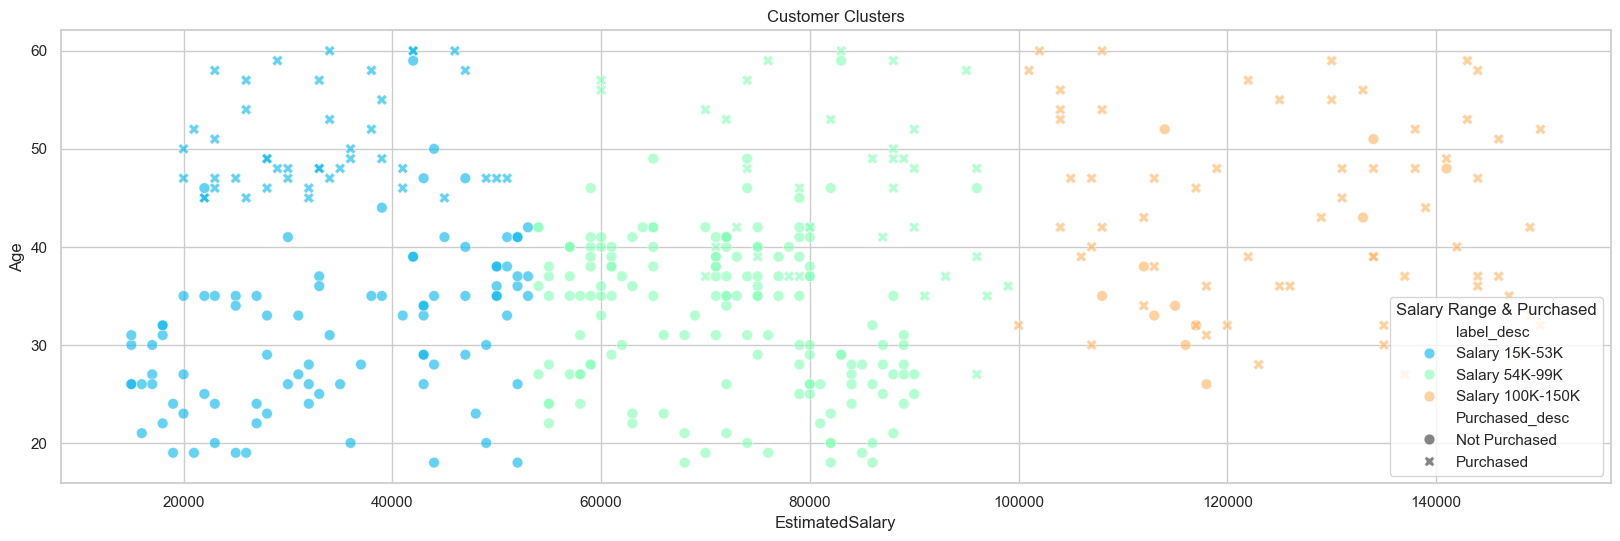

In [116]:
#Plot Distribution
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)

# Create scatterplot with hue for label and style for Purchased
sns.scatterplot(
    x='EstimatedSalary', 
    y='Age', 
    data=ad_clicks_modified,
    hue='label_desc',
    style='Purchased_desc',
    palette='rainbow',
    s=60,
    alpha=0.6,
    legend='full'  # Ensures full legend with both hue and style
)

plt.title('Customer Clusters')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')

# Customize legend title
plt.legend(title='Salary Range & Purchased')

plt.show()

<h4>Determing Purchasing Distribution of Clusters

<h5>Cluster 0

<Figure size 800x600 with 0 Axes>

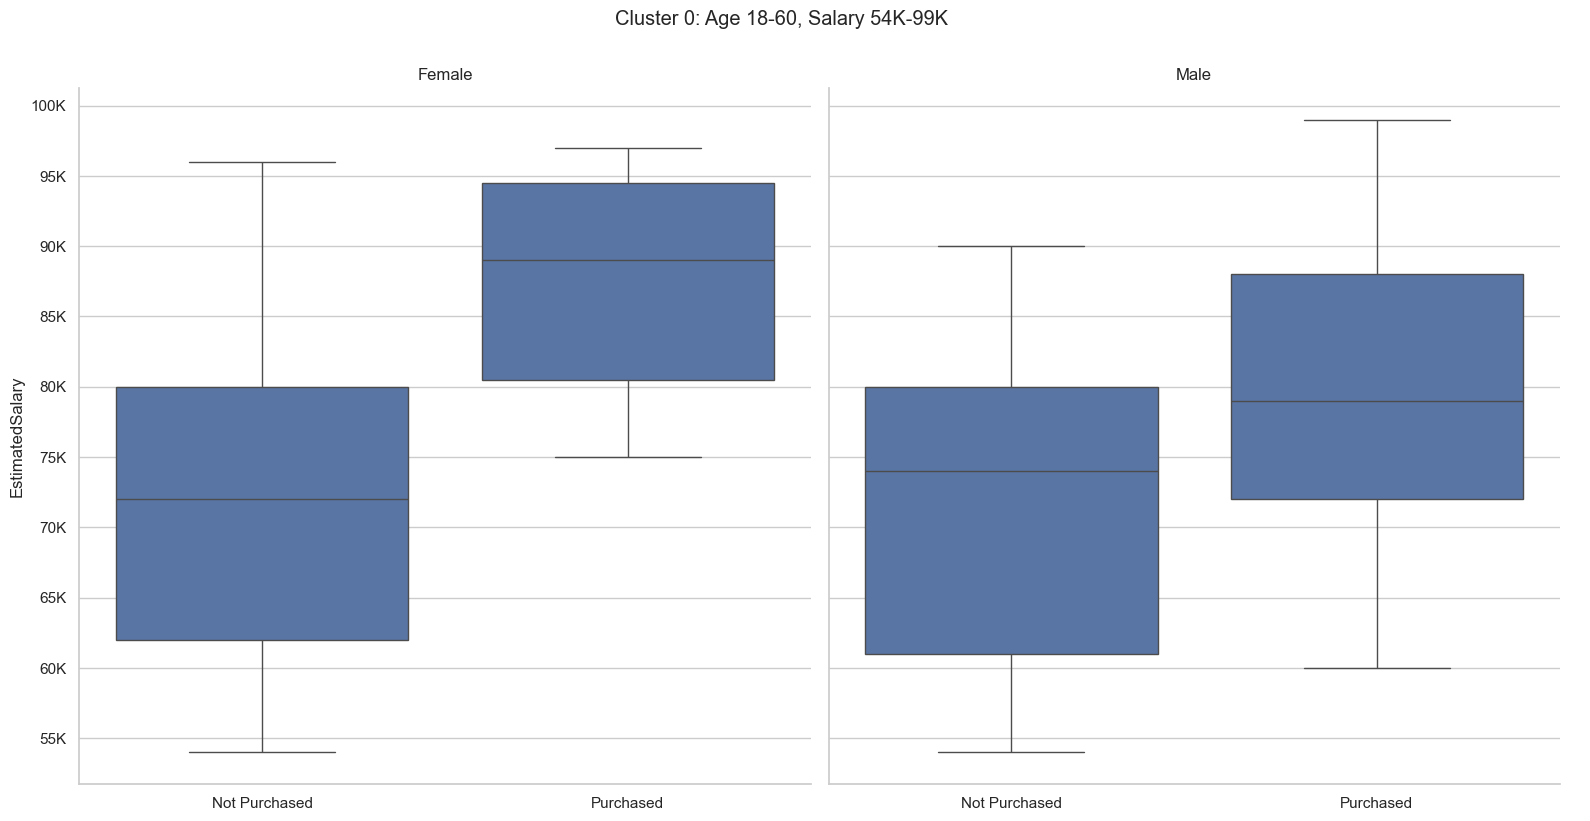

In [138]:
from matplotlib.ticker import MultipleLocator, FuncFormatter
cluster_0 = ad_clicks_modified.loc[ad_clicks_modified['label_ageES'] == 0]

plt.figure(figsize=(8,6))
ax = sns.catplot(
    x="Purchased_desc", 
    y="EstimatedSalary", 
    col="Gender_desc", 
    data=cluster_0, 
    kind="box", 
    height=8, 
    aspect=1)

# Clean facet titles
ax.set_titles("{col_name}")
# Remove x-label for all facets in one line
ax.set_axis_labels(x_var="")
# Set y-axis ticks every 5K (modify just the first subplot)
ax.axes[0, 0].yaxis.set_major_locator(MultipleLocator(5000))  
# Define a formatter function to convert numbers to "50K" format
def salary_formatter(x, pos):
    return f"{int(x/1000)}K"
ax.axes[0, 0].yaxis.set_major_formatter(FuncFormatter(salary_formatter))

ax.fig.suptitle("Cluster 0: Age 18-60, Salary 54K-99K", y=1.05)  # y parameter adjusts vertical position
plt.show()

Cluster 0 Pairwise Distributions

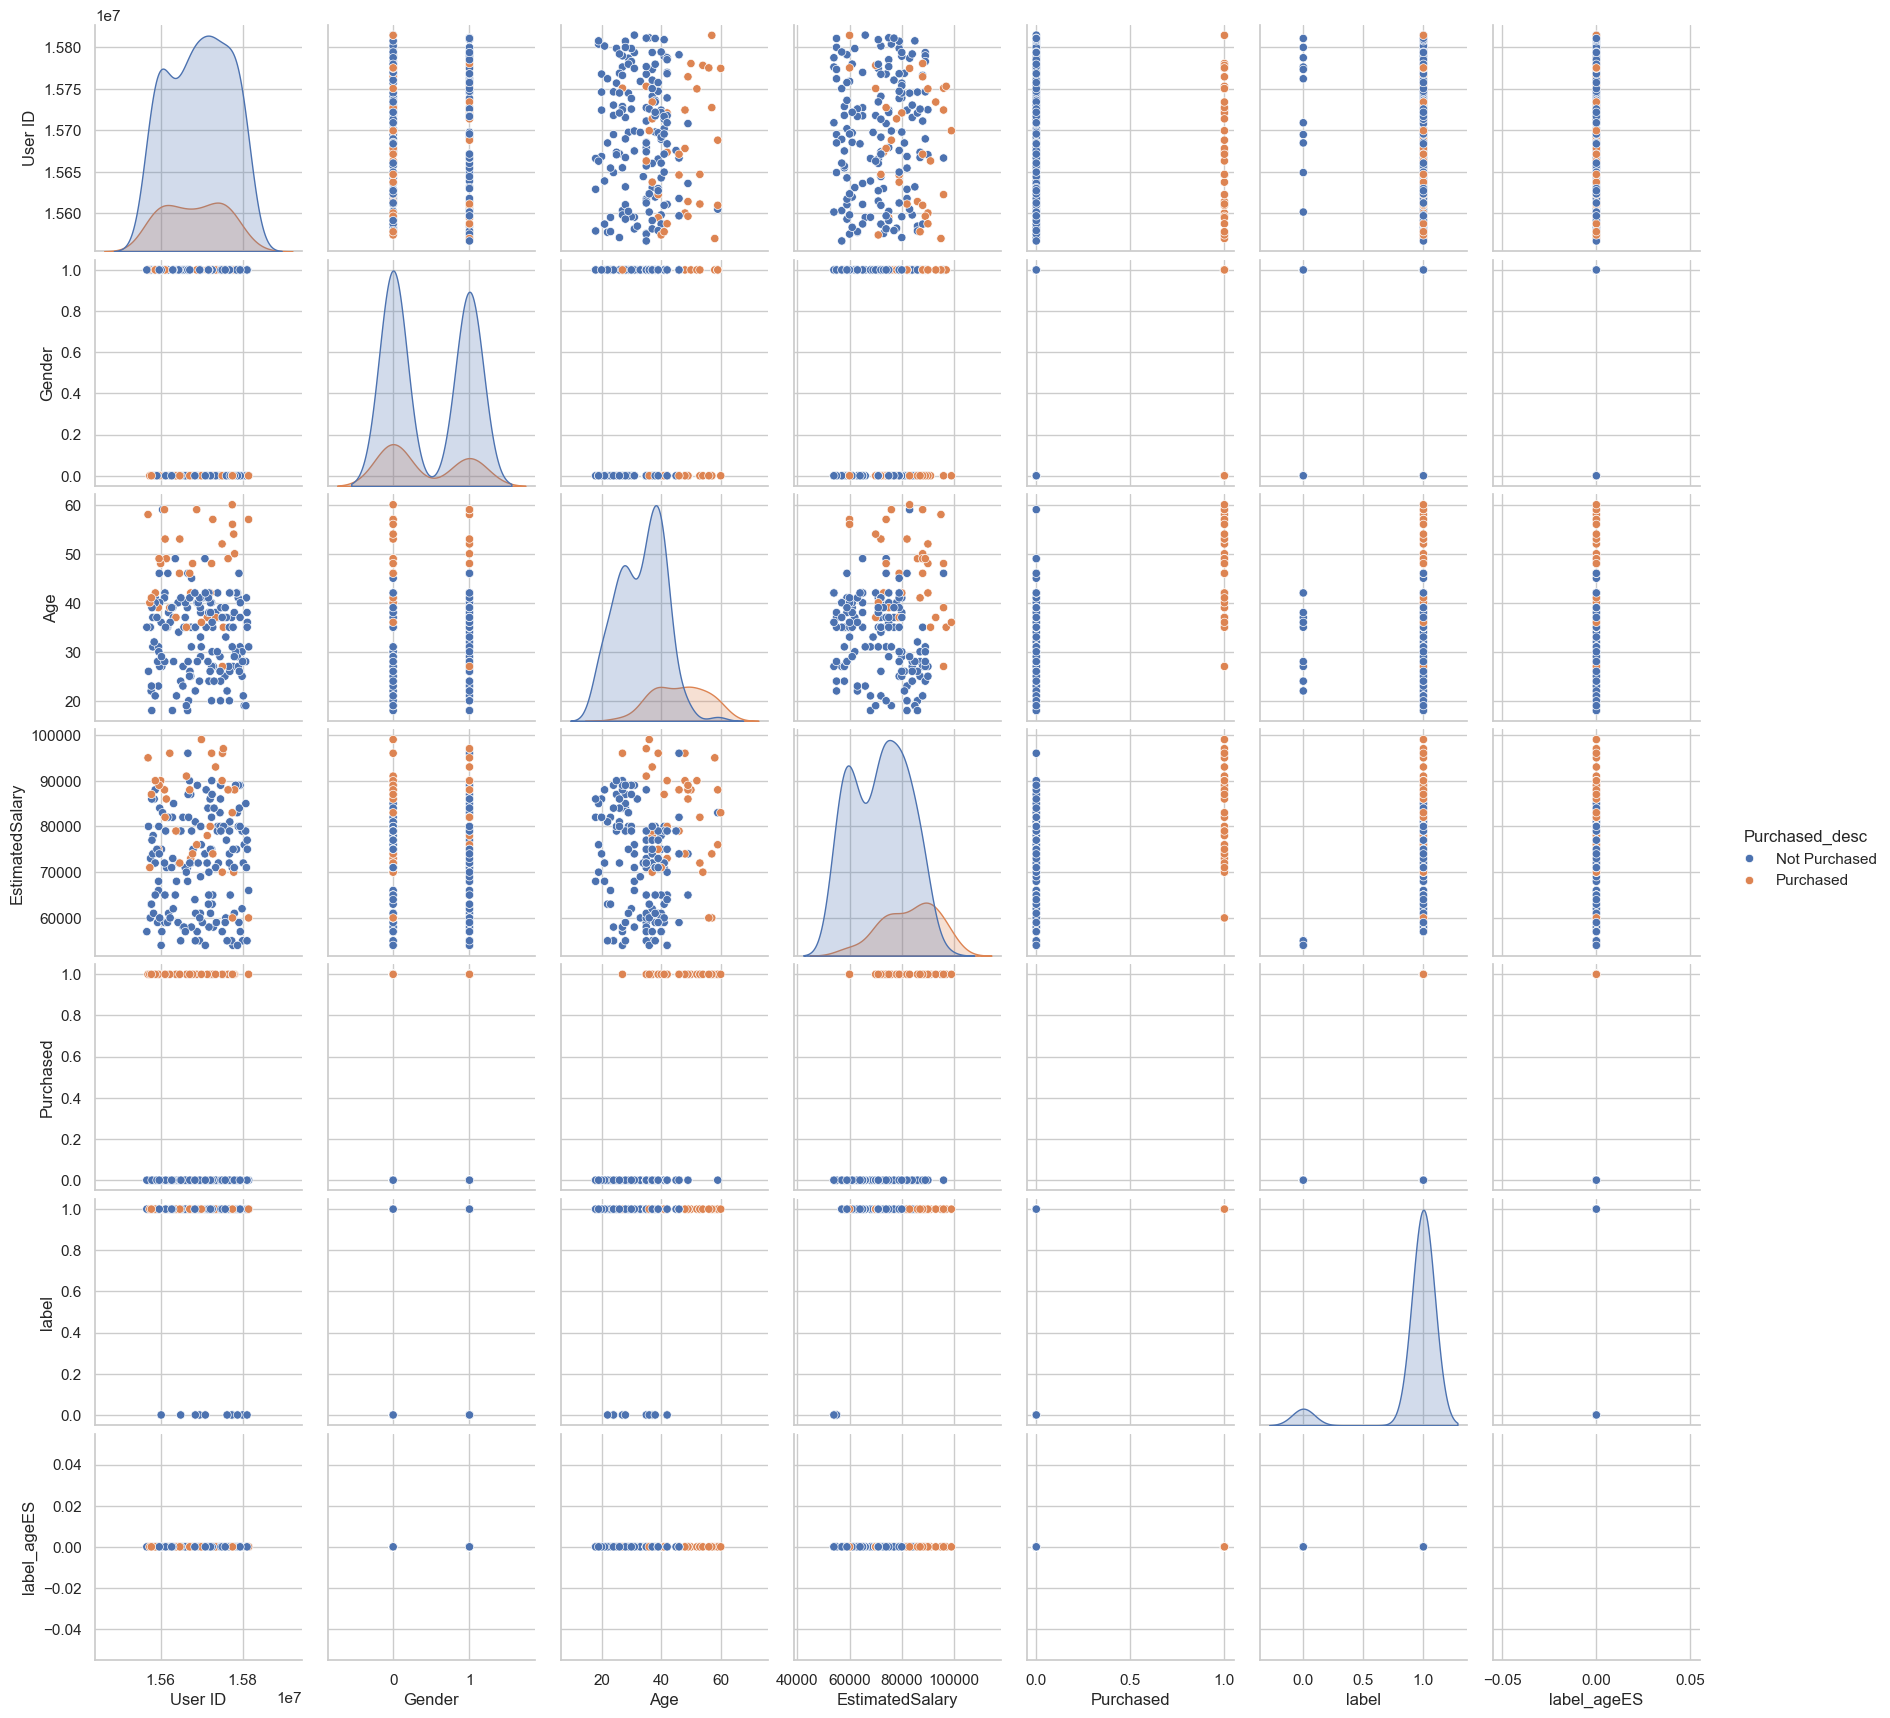

In [122]:
sns.pairplot(data=cluster_0,hue='Purchased_desc')

<h5>Cluster 1

<Figure size 800x600 with 0 Axes>

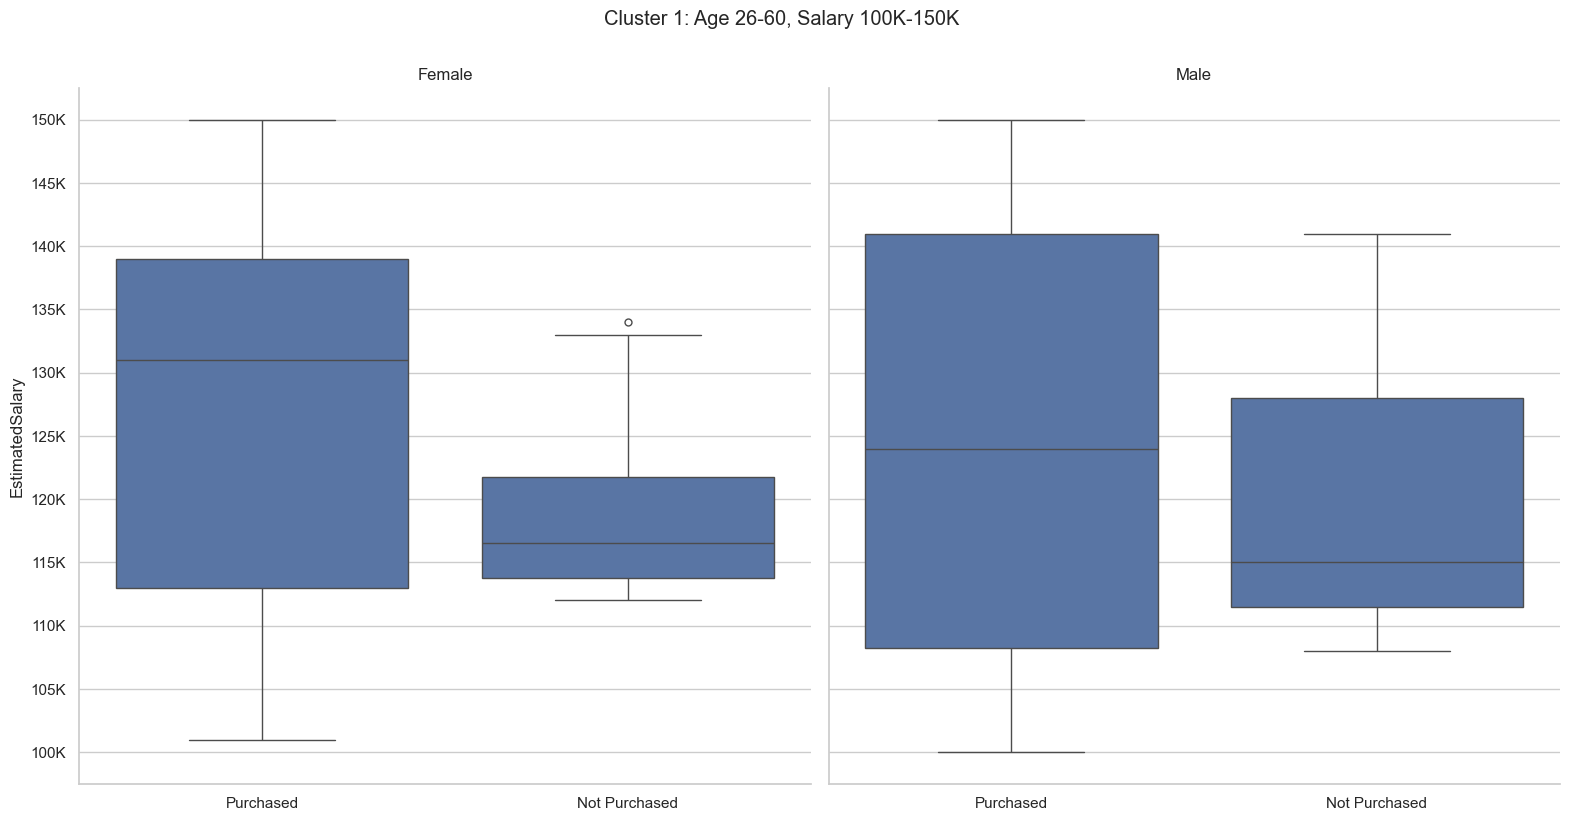

In [139]:
#"Gender/Purchase Analysis for Target Salary Range 55K-100K"
cluster_1 = ad_clicks_modified.loc[ad_clicks_modified['label_ageES'] == 1]

plt.figure(figsize=(8,6))
ax = sns.catplot(
    x="Purchased_desc", 
    y="EstimatedSalary", 
    col="Gender_desc", 
    data=cluster_1, 
    kind="box", 
    height=8, 
    aspect=1)

# Clean facet titles
ax.set_titles("{col_name}")
# Remove x-label for all facets in one line
ax.set_axis_labels(x_var="")
# Set y-axis ticks every 5K (modify just the first subplot)
ax.axes[0, 0].yaxis.set_major_locator(MultipleLocator(5000))  
# Define a formatter function to convert numbers to "50K" format
def salary_formatter(x, pos):
    return f"{int(x/1000)}K"
ax.axes[0, 0].yaxis.set_major_formatter(FuncFormatter(salary_formatter))

ax.fig.suptitle("Cluster 1: Age 26-60, Salary 100K-150K", y=1.05)  # y parameter adjusts vertical position
plt.show()



Cluster 1 Pairwise Distributions 

In [ ]:
sns.pairplot(data=cluster_1,hue='Purchased')

<h5>Cluster 2

<Figure size 800x600 with 0 Axes>

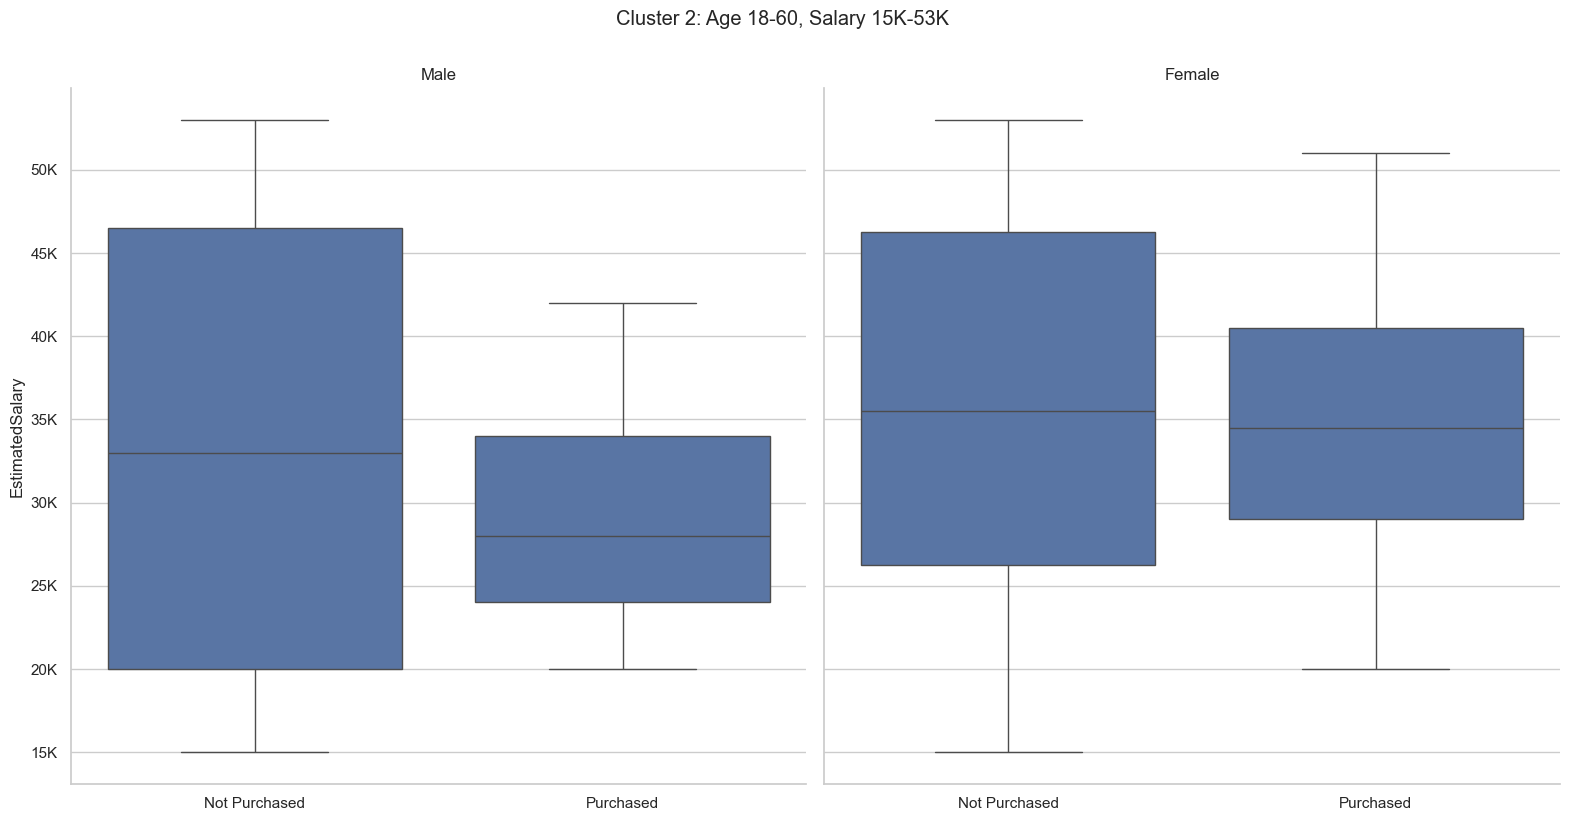

In [142]:
#"Gender/Purchase Analysis for Target Salary Range 100K-150K"
cluster_2 = ad_clicks_modified.loc[ad_clicks_modified['label_ageES'] == 2]

plt.figure(figsize=(8,6))
ax = sns.catplot(
    x="Purchased_desc", 
    y="EstimatedSalary", 
    col="Gender_desc", 
    data=cluster_2, 
    kind="box", 
    height=8, 
    aspect=1)

# Clean facet titles
ax.set_titles("{col_name}")
# Remove x-label for all facets in one line
ax.set_axis_labels(x_var="")
# Set y-axis ticks every 5K (modify just the first subplot)
ax.axes[0, 0].yaxis.set_major_locator(MultipleLocator(5000))  
# Define a formatter function to convert numbers to "50K" format
def salary_formatter(x, pos):
    return f"{int(x/1000)}K"
ax.axes[0, 0].yaxis.set_major_formatter(FuncFormatter(salary_formatter))

ax.fig.suptitle("Cluster 2: Age 18-60, Salary 15K-53K", y=1.05)  # y parameter adjusts vertical position
plt.show()

Cluster 2 Pairwise Distributions 

In [ ]:
sns.pairplot(data=cluster_2,hue='Purchased')

In [ ]:
cluster_2.iloc[:,1:4] #kmeans cluster range solution 

<b>K-means Tier Range sub-divided Cluster Invariants

<h4>Cluster 0

In [ ]:
from sklearn.cluster import KMeans
X2=cluster_0[["Age","EstimatedSalary","Gender"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cluster_0.iloc[:,1:4])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_0.iloc[:,1:4]) #fit and assign
cluster_0["label_2"] = clusters #labels to column

In [ ]:
cluster_0P = cluster_1[cluster_0.Purchased==1]
cluster_0NP = cluster_1[cluster_0.Purchased==0]

In [ ]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1)
sns.scatterplot(cluster_0[cluster_0.label_2 == 0].loc[:,'EstimatedSalary'], cluster_0[cluster_0.label_2  == 0].loc[:,'Age'],style=cluster_0['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster1', alpha=0.8)
sns.scatterplot(cluster_0[cluster_0.label_2 == 1].loc[:,'EstimatedSalary'], cluster_0[cluster_0.label_2 == 1].loc[:,'Age'],style=cluster_0['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster2', alpha=0.8)
sns.scatterplot(cluster_0[cluster_0.label_2 == 2].loc[:,'EstimatedSalary'], cluster_0[cluster_0.label_2 == 2].loc[:,'Age'],style=cluster_0['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 5000))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster_1')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()

<b>K-means Tier Range Cluster Invariants - Cluster 1

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_1.iloc[:,1:4]) #fit and assign
cluster_1["label_2"] = clusters #labels to column

In [ ]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1)
sns.scatterplot(cluster_1[cluster_1.label_2 == 0].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2  == 0].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster1', alpha=0.8)
sns.scatterplot(cluster_1[cluster_1.label_2 == 1].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2 == 1].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster2', alpha=0.8)
sns.scatterplot(cluster_1[cluster_1.label_2 == 2].loc[:,'EstimatedSalary'], cluster_1[cluster_1.label_2 == 2].loc[:,'Age'],style=cluster_1['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 5000))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster_1')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.legend()

<b>K-means Tier Range Cluster Invariants - Cluster 2

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(cluster_2.iloc[:,1:4]) #fit and assign
cluster_2["label_2"] = clusters #labels to column

In [ ]:
# Plot distributions
plt.figure(figsize=(24,24))
plt.subplot(3, 1, 1)
sns.scatterplot(cluster_2[cluster_2.label_2 == 0].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2 == 0].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 1', alpha=0.8)
sns.scatterplot(cluster_2[cluster_2.label_2 == 1].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2  == 1].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 2', alpha=0.8)
sns.scatterplot(cluster_2[cluster_2.label_2 == 2].loc[:,'EstimatedSalary'], cluster_2[cluster_2.label_2  == 2].loc[:,'Age'],style=cluster_2['Purchased'], s= 80, cmap='rainbow', label = 'Salary Cluster 3', alpha=0.8)
#plt.xticks(np.arange(0, 10, 1)) 
#plt.yticks(np.arange(0, 100, 15))
axes = plt.gca()
#axes.set_xlim(0, 500)
#axes.set_ylim(0, 10000)
plt.title('Cluster 2')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()